# RabbitMQ Events Data V1 Jupyter Notebook
    this notebook is for visualizing trends, calculating activity rates within different routing keys
    and headers.node/ headers.name combinations ,and finally generating new datasets with the obtained activity rate results.

## 1. Import Libraries and utilities

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
#from tabulate import tabulate

import numpy as np
import pandas as pd
import os
import datetime as dt


## 2. Load RabbitMQ Events Data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from config import *
#Paths defined in Config file python

#Saas Paths
#raw_saas_path  
#proc_saas_path  

#RabbitMQ paths
#raw_evts_path  
#proc_evts_path  

#function for loading data
def load_data(csv_path):
    return pd.read_csv(csv_path,\
                    parse_dates=['timestamp'] ,index_col=['timestamp'])#comment if timestamp indexing not wanted
                      

events = load_data(raw_evts_v1)


events.head()

C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (4,9,10,11,12,13,15,21,22,25,26,27,28,29,30,31,32,33,34,39,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,_id,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.pid,headers.vhost,headers.prefetch_count,headers.consumer_tag,headers.channel,headers.exclusive,headers.arguments,headers.ack_required,headers.user_who_performed_action,headers.queue,headers.number,headers.connection,headers.user,headers.ssl_cipher,headers.connected_at,headers.type,headers.ssl,headers.timeout,headers.frame_max,headers.protocol,headers.client_properties.0,headers.client_properties.1,headers.client_properties.2,headers.client_properties.3,headers.client_properties.4,headers.client_properties.5,headers.client_properties.6,headers.host,headers.auth_mechanism,headers.ssl_protocol,headers.peer_cert_subject,headers.ssl_key_exchange,headers.peer_cert_validity,headers.peer_port,headers.ssl_hash,headers.peer_cert_issuer,headers.channel_max,headers.port,headers.peer_host,headers.connection_name,headers.connection_type,_class
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01 15:40:23+00:00,5e5be539d601800001580c0c,consumer.deleted,1583077223236,NaN,NaN,NaN,/,NaN,amq.ctag-M0RcJABURipDEN0uVtdvMg,<rabbit@rabbitmq-test.1.18414.3>,NaN,NaN,NaN,admin,event.all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-03-01 15:40:23+00:00,5e5be539d601800001580c0d,channel.closed,1583077223692,NaN,NaN,<rabbit@rabbitmq-test.1.18414.3>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-03-01 15:40:23+00:00,5e5be539d601800001580c0e,connection.closed,1583077223708,rabbit@rabbitmq-test,172.17.0.1:48436 -> 172.17.0.3:5672,<rabbit@rabbitmq-test.1.18406.3>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{<<""connection_name"">>,longstr,<<""rabbitConnec...","{<<""product"">>,longstr,<<""RabbitMQ"">>}","{<<""copyright"">>,longstr,<<""Copyright (c) 2007...","{<<""capabilities"">>,table,[{<<""exchange_exchan...","{<<""information"">>,longstr,<<""Licensed under t...","{<<""version"">>,longstr,<<""5.1.2"">>}","{<<""platform"">>,longstr,<<""Java"">>}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...
2020-03-01 16:06:17+00:00,5e5be539d601800001580c0f,user.authentication.success,1583078777655,NaN,admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,"{0,9,1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{0,0,0,0,0,65535,44049,3}",PLAIN,NaN,NaN,NaN,NaN,33204,NaN,NaN,NaN,NaN,"{0,0,0,0,0,65535,44049,1}",172.17.0.1:33204 -> 172.17.0.3:5672,network,com.bl.interop.messaging.monitoring.event.doma...
2020-03-01 16:06:17+00:00,5e5be539d601800001580c10,connection.created,1583078777659,rabbit@rabbitmq-test,172.17.0.1:33204 -> 172.17.0.3:5672,<rabbit@rabbitmq-test.1.15639.9>,/,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,NaN,NaN,admin,NaN,1.583079e+12,network,False,60.0,131072.0,"{0,9,1}","{<<""connection_name"">>,longstr,<<""rabbitConnec...","{<<""product"">>,longstr,<<""RabbitMQ"">>}","{<<""copyright"">>,longstr,<<""Copyright (c) 2007...","{<<""capabilities"">>,table,[{<<""exchange_exchan...","{<<""information"">>,longstr,<<""Licensed under t...","{<<""version"">>,longstr,<<""5.1.2"">>}","{<<""platform"">>,longstr,<<""Java"">>}","{0,0,0,0,0,65535,44049,3}",PLAIN,NaN,NaN,NaN,NaN,33204,NaN,NaN,2047.0,5672,"{0,0,0,0,0,65535,44049,1}",NaN,NaN,com.bl.interop.messaging.monitoring.event.doma...


In [4]:
print('events total size ')
print(events.shape)
print('')
print('events columns')
print(events.columns)

events total size 
(738458, 47)

events columns
Index(['_id', 'routing_key', 'headers.timestamp_in_ms', 'headers.node',
       'headers.name', 'headers.pid', 'headers.vhost',
       'headers.prefetch_count', 'headers.consumer_tag', 'headers.channel',
       'headers.exclusive', 'headers.arguments', 'headers.ack_required',
       'headers.user_who_performed_action', 'headers.queue', 'headers.number',
       'headers.connection', 'headers.user', 'headers.ssl_cipher',
       'headers.connected_at', 'headers.type', 'headers.ssl',
       'headers.timeout', 'headers.frame_max', 'headers.protocol',
       'headers.client_properties.0', 'headers.client_properties.1',
       'headers.client_properties.2', 'headers.client_properties.3',
       'headers.client_properties.4', 'headers.client_properties.5',
       'headers.client_properties.6', 'headers.host', 'headers.auth_mechanism',
       'headers.ssl_protocol', 'headers.peer_cert_subject',
       'headers.ssl_key_exchange', 'headers.peer_cert_

In [5]:

print('events Data starting date ')
print(events.index.min())
print('')
print('events Data Ending date')
print(events.index.max())

events Data starting date 
2019-01-28 14:38:38+00:00

events Data Ending date
2020-03-27 16:52:07+00:00


In [6]:
events.columns

Index(['_id', 'routing_key', 'headers.timestamp_in_ms', 'headers.node',
       'headers.name', 'headers.pid', 'headers.vhost',
       'headers.prefetch_count', 'headers.consumer_tag', 'headers.channel',
       'headers.exclusive', 'headers.arguments', 'headers.ack_required',
       'headers.user_who_performed_action', 'headers.queue', 'headers.number',
       'headers.connection', 'headers.user', 'headers.ssl_cipher',
       'headers.connected_at', 'headers.type', 'headers.ssl',
       'headers.timeout', 'headers.frame_max', 'headers.protocol',
       'headers.client_properties.0', 'headers.client_properties.1',
       'headers.client_properties.2', 'headers.client_properties.3',
       'headers.client_properties.4', 'headers.client_properties.5',
       'headers.client_properties.6', 'headers.host', 'headers.auth_mechanism',
       'headers.ssl_protocol', 'headers.peer_cert_subject',
       'headers.ssl_key_exchange', 'headers.peer_cert_validity',
       'headers.peer_port', 'headers.

## 3. Exploring the data

In [7]:
#events.info()
#events.isnull().sum()

# Check min value of index 
print('events data starting date')
print(events.index.min())

# Check max value of index 
print('events data ending date')
print(events.index.max())
print("")
#events['headers.queue'].value_counts()
#events['headers.name'].value_counts()
print('routing key values')
events['routing_key'].value_counts()

events data starting date
2019-01-28 14:38:38+00:00
events data ending date
2020-03-27 16:52:07+00:00

routing key values


connection.closed              571901
channel.created                 79043
channel.closed                  78865
user.authentication.success      2040
connection.created               2039
consumer.created                 1864
consumer.deleted                 1711
user.tags.set                     226
user.created                      221
user.deleted                      212
permission.created                110
binding.created                    64
binding.deleted                    44
queue.created                      33
queue.deleted                      23
user.authentication.failure        23
exchange.created                    9
exchange.deleted                    9
permission.deleted                  8
user.password.changed               5
vhost.down                          5
topic.permission.created            2
node.node.stats                     1
Name: routing_key, dtype: int64

In [8]:
events['headers.name'].value_counts()

10.238.28.1:39968 -> 10.238.28.5:5672 (1)    13383
10.238.28.1:39342 -> 10.238.28.5:5672 (1)    13383
10.238.28.1:39510 -> 10.238.28.5:5672 (1)    10388
10.238.28.1:33454 -> 10.238.28.5:5672 (1)    10385
10.238.28.1:47446 -> 10.238.28.5:5672 (1)     4681
                                             ...  
10.34.132.254:54148 -> 10.238.28.5:5672          1
10.238.28.1:49692 -> 10.238.28.5:5672            1
127.0.0.1:34132 -> 127.0.0.1:5672                1
10.240.11.24:59050 -> 10.238.28.5:5672           1
10.240.11.24:58600 -> 10.238.28.5:5672           1
Name: headers.name, Length: 32982, dtype: int64

In [9]:
events['headers.user'].value_counts()


bus-consolesaas            78848
blmom-enfance               1105
bus-accesstoken              328
bus-decisionnel              305
bus-blsenior                 131
bus-legibase                 123
admin                        114
bus-keycloak                  45
bus-rabbitmq-interop          39
blmom-1234                    37
bus-relay                     34
blmom-56776                   20
bus-pen                       15
blmom-56776-bl                10
blmom-123                     10
mom-1234                       8
mom-56776                      8
blmom-1234-bl                  4
popeye                         3
manager                        3
blmom-56776-test               2
blmom-12345                    2
bllmom-56776                   2
test                           2
bus-portail-decisionnel        1
admintest                      1
blmom-test                     1
bus-socle                      1
Name: headers.user, dtype: int64

In [10]:
events['headers.connection_type'].value_counts()



network    2014
direct       49
Name: headers.connection_type, dtype: int64

In [11]:
events['headers.user_who_performed_action'].value_counts()

bus-consolesaas         157860
blmom-enfance             2526
admin                      869
bus-accesstoken            760
rmq-internal               751
bus-decisionnel            747
bus-blsenior               288
bus-legibase               262
admintest                  128
bus-keycloak               107
bus-rabbitmq-interop        93
bus-relay                   71
bus-pen                     27
manager                      3
Name: headers.user_who_performed_action, dtype: int64

In [12]:
events['headers.channel_max'].value_counts()

0.0       1319
2047.0     671
Name: headers.channel_max, dtype: int64

## 3. Features


## Add/compose Temporal Features from the timestamp

In [13]:

dates = pd.DatetimeIndex(events.index.values)
events['hour'] = dates.hour #create column containing the hour
events['season'] = (dates.month%12 + 3)//3 # Calculates the season (categorical)
events['year']=dates.year
events['month']=dates.month
events['day']=dates.day
events['minutes'] = dates.minute
events["dow"] = events.index.weekday #monday 0,tuesday 1 ,wed 2,thurs 3,fri 4,sat 5 ,sunday 6
events['seconds'] = dates.second

    the following blocks are for decomposing the dataset according to different routing_keys
    and extracting the later into csv files

In [14]:
df=events.copy()

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['route_key'] = LE.fit_transform(df['routing_key'])

LE.classes_


array(['binding.created', 'binding.deleted', 'channel.closed',
       'channel.created', 'connection.closed', 'connection.created',
       'consumer.created', 'consumer.deleted', 'exchange.created',
       'exchange.deleted', 'node.node.stats', 'permission.created',
       'permission.deleted', 'queue.created', 'queue.deleted',
       'topic.permission.created', 'user.authentication.failure',
       'user.authentication.success', 'user.created', 'user.deleted',
       'user.password.changed', 'user.tags.set', 'vhost.down'],
      dtype=object)

In [15]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738458 entries, 0 to 738457
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   timestamp                          738458 non-null  datetime64[ns, UTC]
 1   _id                                738458 non-null  object             
 2   routing_key                        738458 non-null  object             
 3   headers.timestamp_in_ms            738458 non-null  int64              
 4   headers.node                       573945 non-null  object             
 5   headers.name                       655789 non-null  object             
 6   headers.pid                        731848 non-null  object             
 7   headers.vhost                      84959 non-null   object             
 8   headers.prefetch_count             1864 non-null    float64            
 9   headers.consumer_tag               35

In [16]:
df['timestamp'] = df['timestamp'].astype(str).str[:-6]

In [17]:

channel_closed = df.loc[df['route_key'].isin([2])]
channel_created = df.loc[df['route_key'].isin([3])]

connect_closed = df.loc[df['route_key'].isin([4 ])]
connect_created = df.loc[df['route_key'].isin([ 5])]

consum_created = df.loc[df['route_key'].isin([6 ])]
consum_deleted = df.loc[df['route_key'].isin([7])]

bind_created = df.loc[df['route_key'].isin([0 ])]
bind_deleted = df.loc[df['route_key'].isin([ 1])]

queue_created = df.loc[df['route_key'].isin([13])]
queue_deleted = df.loc[df['route_key'].isin([ 14])]

user_authen_fail  = df.loc[df['route_key'].isin([16 ])]
user_authen_succ  = df.loc[df['route_key'].isin([ 17 ])]
user_created  = df.loc[df['route_key'].isin([ 18 ])]
user_deleted  = df.loc[df['route_key'].isin([19])]
user_pass_chg  = df.loc[df['route_key'].isin([20 ])]
user_tags  = df.loc[df['route_key'].isin([21])]


exchange_created = df.loc[df['route_key'].isin([8 ])]
exchange_deleted = df.loc[df['route_key'].isin([ 9])]

perm_created = df.loc[df['route_key'].isin([11])] #includes the topic.permission.created along with permissions
perm_deleted = df.loc[df['route_key'].isin([12])] #includes the topic.permission.created along with permissions
topic_perm = df.loc[df['route_key'].isin([15])] #includes the topic.permission.created along with permissions

nodes_stats = df.loc[df['route_key'].isin([10  ])]
vhost_stats = df.loc[df['route_key'].isin([ 22 ])]



## The following code section is for generating excel files 

## Keep only relevant features

In [18]:
df = events.copy()
df = df[["routing_key",
         "headers.timestamp_in_ms",
         "headers.node",
         "headers.name",
         "headers.vhost",
        "headers.consumer_tag",
         "headers.channel",
         "headers.peer_port",
        "headers.port",
         "headers.peer_host",
         "headers.connection_type",
        "headers.user_who_performed_action",
         "headers.queue",
        "headers.user",
         "headers.connection",
         "headers.host",
         "headers.ssl_hash",
         "headers.auth_mechanism",
         "headers.peer_host" ,
        "headers.connection_name",
         "headers.connection_type",
        "year",
         "month",
         "day",
         "hour",
         "minutes",
         "seconds"
]]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 738458 entries, 2020-03-01 15:40:23+00:00 to 2020-03-27 16:52:07+00:00
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   routing_key                        738458 non-null  object 
 1   headers.timestamp_in_ms            738458 non-null  int64  
 2   headers.node                       573945 non-null  object 
 3   headers.name                       655789 non-null  object 
 4   headers.vhost                      84959 non-null   object 
 5   headers.consumer_tag               3575 non-null    object 
 6   headers.channel                    3575 non-null    object 
 7   headers.peer_port                  4054 non-null    object 
 8   headers.port                       2039 non-null    object 
 9   headers.peer_host                  4053 non-null    object 
 10  headers.connection_type            2063 non-null    object

## Encode labels for different event types

In [20]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['route_key'] = LE.fit_transform(df['routing_key'])

LE.classes_

array(['binding.created', 'binding.deleted', 'channel.closed',
       'channel.created', 'connection.closed', 'connection.created',
       'consumer.created', 'consumer.deleted', 'exchange.created',
       'exchange.deleted', 'node.node.stats', 'permission.created',
       'permission.deleted', 'queue.created', 'queue.deleted',
       'topic.permission.created', 'user.authentication.failure',
       'user.authentication.success', 'user.created', 'user.deleted',
       'user.password.changed', 'user.tags.set', 'vhost.down'],
      dtype=object)

*mappings :* 

    ['binding.created' 0, 'binding.deleted' 1 , 'channel.closed'2,
       'channel.created' 3, 'connection.closed' 4, 'connection.created' 5,
       'consumer.created' 6, 'consumer.deleted' 7, 'exchange.created' 8,
       'exchange.deleted' 9, 'node.node.stats' 10, 'permission.created' 11 ,
       'permission.deleted' 12 , 'queue.created' 13, 'queue.deleted' 14,
       'topic.permission.created' 15, 'user.authentication.failure' 16,
       'user.authentication.success' 17 , 'user.created' 18, 'user.deleted' 19,
       'user.password.changed' 20, 'user.tags.set' 21, 'vhost.down' 22]

## 4. General Histogram Visualizing

## Visualizing 2019 Histograms 

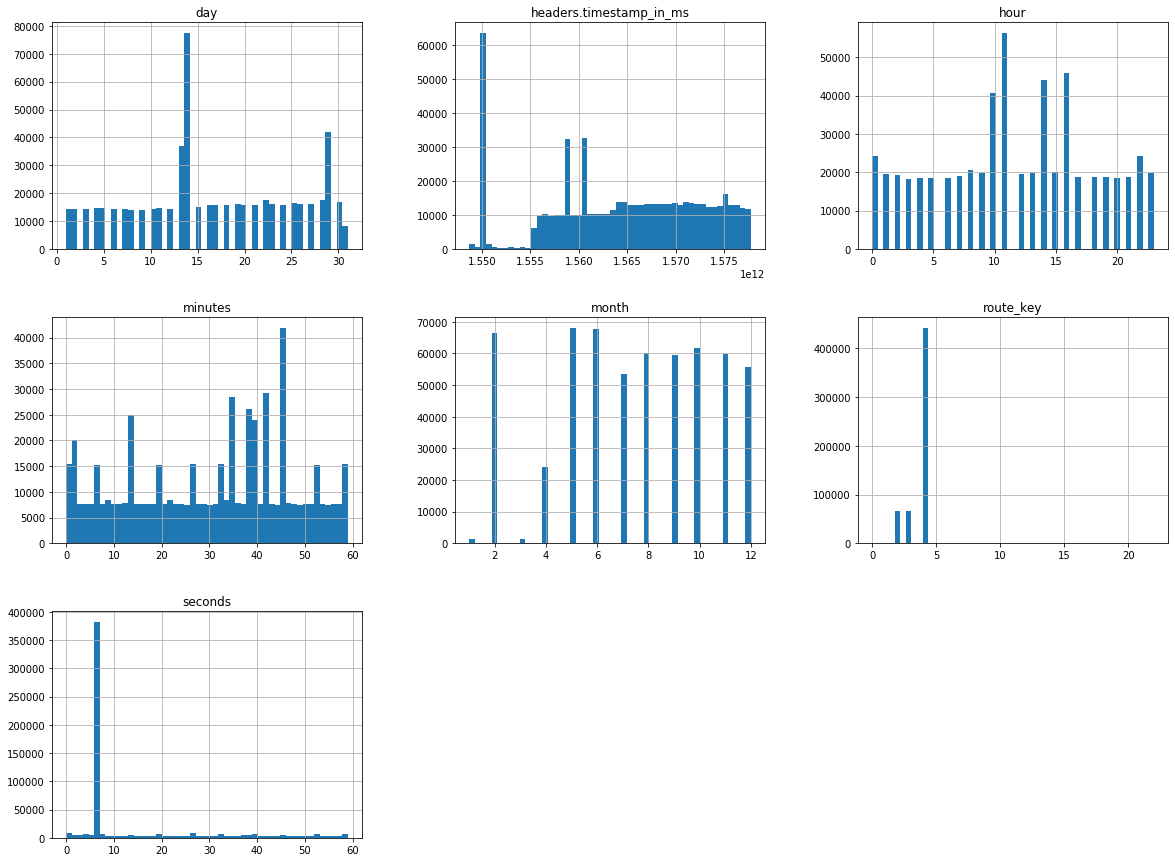

In [21]:
#df = df.drop('year', 1)

rec_2019 = df.loc['2019-01-01':'2019-12-30']
rec_2019= rec_2019.drop(['year' ,'headers.ssl_hash'] ,axis=1)
rec_2019.hist(bins=50, figsize=(20,15))
plt.show()

*notes:* 

    Season :peaks towards the summer season followed by fourth season which consists of decembre-novembre-octobre

    hour :most events occured 11h followed by 15h

    dow: most activity is accomplished within thursday followed by wednesday and friday.However we notice there is some activity within the weekends (recall that monday 0,tuesday 1 ,wed 2,thurs 3 and so on)

    month:05-06-02 most active months (may,june,and february)

    route_key: we notice that the most used routing_key is 'connection.closed' followed by  'channel.closed',and
       'channel.created'


## Visualizing 2020 Histograms 

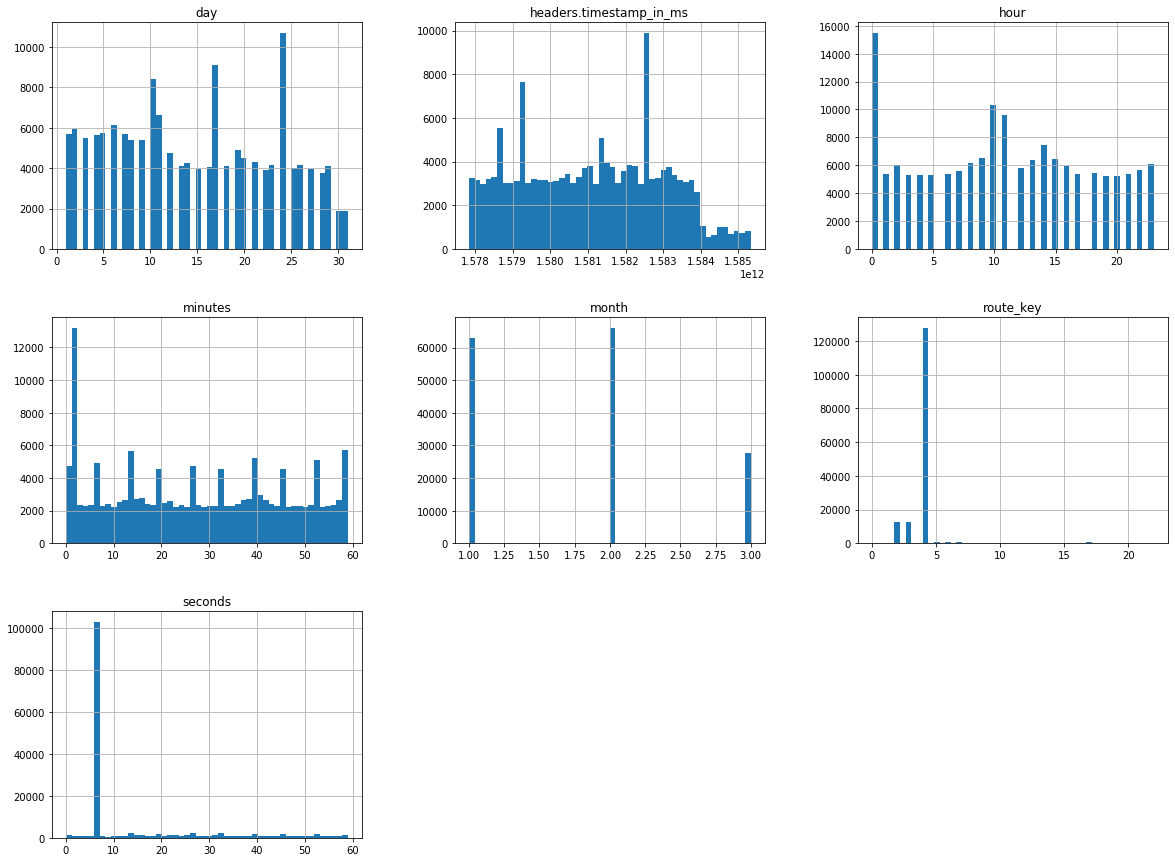

In [22]:
rec_2020 = df.loc['2020-01-01':'2020-03-30']
rec_2020 = rec_2020.drop(['year' ,'headers.ssl_hash'] ,axis=1)

rec_2020.hist(bins=50, figsize=(20,15))
plt.show()

*notes:* 
    
    dow: most activity is accomplished within friday followed by monday and wednesday.However we notice there is 
    some activity within the weekends (recall that monday 0,tuesday 1 ,wed 2,thurs 3 and so on)
    
    month:01-02-03 most active months (as ur data is from 01 to 03)

    route_key: we notice that the most used routing_key is 'connection.closed' followed by  'channel.closed',and
       'channel.created'

## 5. Stats and Properties

## Anomaly std function

    In the following section, we define a function called find_anomalies.

    This function allows to analyze some satistical properties of the dataset such as the mean ,the std and enables us to find the threshold for the data distribution.The previous is done based on the assumption that any datasamples lying outside the range of the mean value plus or minus 3 times the standard deviation is considered as
    noise or anomaly.

    Recall that within a normal distribution of data,68% of values are within one standard deviation of the mean
    95% within two standard deviation of the mean and 99.7% within 3 standard deviations.

    standard deviation the standard deviation is a measure of the amount of variation or dispersion of a set 
    of values. 

In [23]:
import numpy as np
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    print('DATA MEAN :')
    print(random_data_mean)
    print('  STD : ')
    print( random_data_std)
    
    # Set upper and lower limit to 3 standard deviation
    anomaly_cut_off = random_data_std * 3
    print("")
    print(' Anomaly_cut_off value (aka std * 3 value) ')
    print(anomaly_cut_off)
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("")
    print("   LIMIT VALUES  :")
    print('upper_limit value')
    print(upper_limit)
    print('lower_limit value')
    print(lower_limit)
    
    # Find outliers
    anomalies = []
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return upper_limit,anomalies

## Median Absolute Deviation
    Knowing that our data is roughly normally distributed, we could use the std method, by which we would consider points to be outliers based on how much they deviate from the mean value; 
    
    However, the mean is not a robust statistic; It is heavily influenced by outliers, meaning that the outliers we are trying to detect would affect the method itself.

    What if we take the same method but, instead of using the mean and standard deviation we use the median and the deviation from the median? 
    The median is a robust statistic, meaning it will not be greatly affected by outliers. This is called the Robust Z-score method, and instead of using standard deviation, it uses the MAD (Median Absolute Deviation).

In [24]:
def mad_based_outlier(points, thresh=3.5):
    '''
    Returns a boolean array with True if points are outliers and False
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), 'Volume 16: How to Detect and
        Handle Outliers', The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor.'''
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    print('')
    print('median')
    print(median)

    
    print('')
    print('diff')
    print(diff)
    med_abs_deviation = np.median(diff)
    print('')
    print('med abs deviation')
    print(med_abs_deviation)
    
    modified_z_score = 0.6745 * diff / med_abs_deviation

    print('')
    print('modified z score ')
    print(modified_z_score)
    
    return (modified_z_score, (modified_z_score > thresh) )
   
    
    



## 2019: Activity rate (hourly and all events)

In [25]:
rec_2019['count'] = 0
groupped_data_19 = rec_2019.groupby(['month','day','hour'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data_19["%"] = groupped_data_19.apply(lambda x:  100*x / x.sum())
print('COUNT MAX: ')
m=groupped_data_19.max()
print(m)
groupped_data_19

COUNT MAX: 
count    13383
dtype: int64


count
month day hour routing_key        headers.name                               headers.user_who_performed_action       
1     28  14   channel.created    10.238.28.1:35406 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:35452 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:35544 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:38128 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:38130 -> 10.238.28.5:5672 (1)  bus-consolesaas                        2
...                                                                                                               ...
12    28  0    channel.created    10.238.28.1:49906 -> 10.238.28.5:5672 (1)  bus-consolesaas                       10
      30  0    channel.created    10.238.28.1:49906 -> 10.238.28.5:5672 (1)  bus-consolesaas                       12
          10   channel.created    10.238.15.51:49677 -> 10.238.28.5:5672 (1) bus-blsenior                           4
                                  10.238.15.51:49677 -> 10.238.28.5:5672 (2) bus-blsenior                           4
               connection.created 10.238.15.51:49677 -> 10.238.28.5:5672     bus-blsenior                           2

[3288 rows x 1 columns]

In [26]:
a, b =mad_based_outlier(groupped_data_19['count'])
print(a)
b
anom = groupped_data_19[b].copy()
anom


median
[1.]

diff
[71. 71. 71. ...  3.  3.  1.]

med abs deviation
0.0

modified z score 
[inf inf inf ... inf inf inf]
[inf inf inf ... inf inf inf]


C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater


count
month day hour routing_key        headers.name                               headers.user_who_performed_action       
1     28  14   channel.created    10.238.28.1:35406 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:35452 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:35544 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:38128 -> 10.238.28.5:5672 (1)  bus-consolesaas                       72
                                  10.238.28.1:38130 -> 10.238.28.5:5672 (1)  bus-consolesaas                        2
...                                                                                                               ...
12    28  0    channel.created    10.238.28.1:49906 -> 10.238.28.5:5672 (1)  bus-consolesaas                       10
      30  0    channel.created    10.238.28.1:49906 -> 10.238.28.5:5672 (1)  bus-consolesaas                       12
          10   channel.created    10.238.15.51:49677 -> 10.238.28.5:5672 (1) bus-blsenior                           4
                                  10.238.15.51:49677 -> 10.238.28.5:5672 (2) bus-blsenior                           4
               connection.created 10.238.15.51:49677 -> 10.238.28.5:5672     bus-blsenior                           2

[1508 rows x 1 columns]

In [27]:
upper_limit , anom = find_anomalies(groupped_data_19['count'])

DATA MEAN :
20.65845498783455
  STD : 
426.62789256207475

 Anomaly_cut_off value (aka std * 3 value) 
1279.8836776862242

   LIMIT VALUES  :
upper_limit value
1300.5421326740588
lower_limit value
-1259.2252226983896


In [28]:
#FETCH rows where data count is outside the limit range
groupped_data_19[groupped_data_19['count']> upper_limit ]

count
month day hour routing_key     headers.name                              headers.user_who_performed_action       
2     14  11   channel.created 10.238.28.1:39342 -> 10.238.28.5:5672 (1) bus-consolesaas                    13383
                               10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                     4681
          16   channel.created 10.238.28.1:39968 -> 10.238.28.5:5672 (1) bus-consolesaas                    13383
5     29  10   channel.created 10.238.28.1:33454 -> 10.238.28.5:5672 (1) bus-consolesaas                    10385
6     13  14   channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                    10388
11    29  0    channel.created 10.238.28.1:37568 -> 10.238.28.5:5672 (1) bus-consolesaas                     1712

## 2020 Activity rate (hourly and all events)

In [29]:
rec_2020['count'] = 0
groupped_data_20 = rec_2020.groupby(['month','day','hour'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data_20["%"] = groupped_data_20.apply(lambda x:  100*x / x.sum())
print('COUNT MAX')
m=groupped_data_20.max()
print(m)

groupped_data_20


COUNT MAX
count    2257
dtype: int64


count
month day hour routing_key        headers.name                                headers.user_who_performed_action       
1     1   0    channel.created    10.238.28.1:49906 -> 10.238.28.5:5672 (1)   bus-consolesaas                      113
          21   channel.created    10.34.132.254:56592 -> 10.238.28.5:5672 (1) blmom-enfance                          2
               connection.created 10.34.132.254:56592 -> 10.238.28.5:5672     blmom-enfance                          1
      2   0    channel.created    10.238.28.1:49906 -> 10.238.28.5:5672 (1)   bus-consolesaas                        5
          18   channel.created    10.34.132.254:47860 -> 10.238.28.5:5672 (1) blmom-enfance                          1
...                                                                                                                ...
3     27  15   channel.created    172.17.0.1:46110 -> 172.17.0.14:5672 (1)    admin                                  1
               connection.created 172.17.0.1:46110 -> 172.17.0.14:5672        admin                                  1
               queue.created      testcreatequeue                             admin                                  1
          16   channel.created    10.238.28.1:56210 -> 10.238.28.5:5672 (1)   bus-consolesaas                        1
               connection.created 10.238.28.1:56210 -> 10.238.28.5:5672       bus-consolesaas                        1

[2168 rows x 1 columns]

In [30]:
upper_limit, anom = find_anomalies(groupped_data_20['count'])

DATA MEAN :
6.371309963099631
  STD : 
75.54725341079515

 Anomaly_cut_off value (aka std * 3 value) 
226.64176023238545

   LIMIT VALUES  :
upper_limit value
233.01307019548508
lower_limit value
-220.27045026928582


In [31]:
#FETCH rows where data count is outside the limit range
groupped_data_20[groupped_data_20['count']> upper_limit ] 

count
month day hour routing_key     headers.name                              headers.user_who_performed_action       
1     10  0    channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     1245
      17  0    channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     2257
2     24  10   channel.created 10.238.28.9:52434 -> 10.238.28.5:5672 (1) bus-consolesaas                     1793
          11   channel.created 10.238.28.9:52434 -> 10.238.28.5:5672 (1) bus-consolesaas                     1506
      29  0    channel.created 10.238.28.8:37500 -> 10.238.28.5:5672 (1) bus-consolesaas                      267
3     2   14   channel.created 10.238.28.8:37500 -> 10.238.28.5:5672 (1) bus-consolesaas                      281

 ## All data activity rate (hourly and all events)

In [32]:
df['count'] = 0
groupped_data  = df.groupby(['year','month','day','hour'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())


print(' ALL GROUPPED DATA ')
print(groupped_data)



print("")
print('COUNT MAX :')
m = (groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
max_act



 ALL GROUPPED DATA 
                                                                                                                    count
year month day hour routing_key        headers.name                              headers.user_who_performed_action       
2019 1     28  14   channel.created    10.238.28.1:35406 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                                       10.238.28.1:35452 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                                       10.238.28.1:35544 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                                       10.238.28.1:38128 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                                       10.238.28.1:38130 -> 10.238.28.5:5672 (1) bus-consolesaas                        2
...                                                                                                                   ...
2020

count
year month day hour routing_key     headers.name                              headers.user_who_performed_action       
2019 2     14  11   channel.created 10.238.28.1:39342 -> 10.238.28.5:5672 (1) bus-consolesaas                    13383
               16   channel.created 10.238.28.1:39968 -> 10.238.28.5:5672 (1) bus-consolesaas                    13383

In [33]:
upper_limit , anom = find_anomalies(groupped_data['count'])

DATA MEAN :
14.983519501922725
  STD : 
334.5180881691515

 Anomaly_cut_off value (aka std * 3 value) 
1003.5542645074545

   LIMIT VALUES  :
upper_limit value
1018.5377840093772
lower_limit value
-988.5707450055318


In [34]:
#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

count
year month day hour routing_key     headers.name                              headers.user_who_performed_action       
2019 2     14  11   channel.created 10.238.28.1:39342 -> 10.238.28.5:5672 (1) bus-consolesaas                    13383
                                    10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                     4681
               16   channel.created 10.238.28.1:39968 -> 10.238.28.5:5672 (1) bus-consolesaas                    13383
     5     29  10   channel.created 10.238.28.1:33454 -> 10.238.28.5:5672 (1) bus-consolesaas                    10385
     6     13  14   channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                    10388
     11    29  0    channel.created 10.238.28.1:37568 -> 10.238.28.5:5672 (1) bus-consolesaas                     1712
2020 1     10  0    channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     1245
           17  0    channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     2257
     2     24  10   channel.created 10.238.28.9:52434 -> 10.238.28.5:5672 (1) bus-consolesaas                     1793
               11   channel.created 10.238.28.9:52434 -> 10.238.28.5:5672 (1) bus-consolesaas                     1506

In [35]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour']), axis=1)

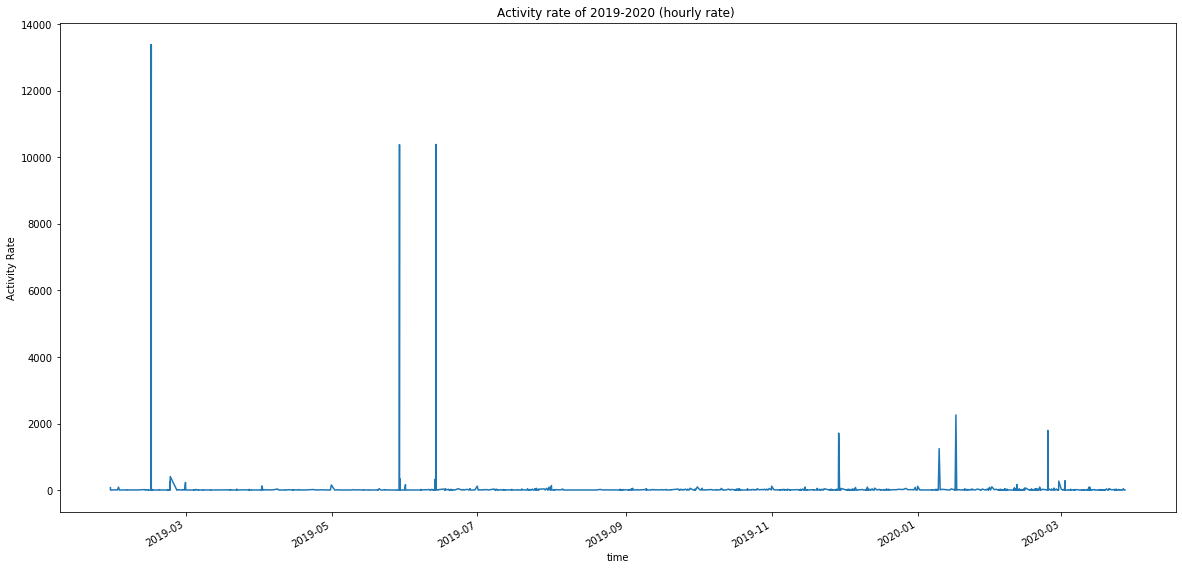

In [36]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate of 2019-2020 (hourly rate) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show()

## ALL Activity Rate (minutes Rate)

In [37]:
df['count'] = 0
groupped_data  = df.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX')
m=groupped_data.max()
print(m)



print("")
print('COUNT MAX :')
m = (groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
max_act





COUNT MAX
count    10388
dtype: int64

COUNT MAX :
10388

Maximum Activity details: 


,,,,,,,,count
year,month,day,hour,minutes,routing_key,headers.name,headers.user_who_performed_action,
2019,6,13,14,42,channel.created,10.238.28.1:39510 -> 10.238.28.5:5672 (1),bus-consolesaas,10388


In [38]:

print(' ALL GROUPPED DATA ')
groupped_data



 ALL GROUPPED DATA 


count
year month day hour minutes routing_key        headers.name                              headers.user_who_performed_action       
2019 1     28  14   38      channel.created    10.238.28.1:38128 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                            connection.created 10.238.28.1:38128 -> 10.238.28.5:5672     bus-consolesaas                        1
                    39      channel.created    10.238.28.1:38130 -> 10.238.28.5:5672 (1) bus-consolesaas                        2
                                               10.238.28.1:38130 -> 10.238.28.5:5672 (2) bus-consolesaas                        2
                                               10.238.28.1:38130 -> 10.238.28.5:5672 (3) bus-consolesaas                        2
...                                                                                                                           ...
2020 3     27  15   49      channel.created    172.17.0.1:46110 -> 172.17.0.14:5672 (1)  admin                                  1
                            connection.created 172.17.0.1:46110 -> 172.17.0.14:5672      admin                                  1
                    50      queue.created      testcreatequeue                           admin                                  1
               16   34      channel.created    10.238.28.1:56210 -> 10.238.28.5:5672 (1) bus-consolesaas                        1
                            connection.created 10.238.28.1:56210 -> 10.238.28.5:5672     bus-consolesaas                        1

[7659 rows x 1 columns]

In [39]:
print(" CONSUMMER EVENTS STATS :")
print(" MAD :")

a, b =mad_based_outlier(groupped_data['count'])
print(a)
print('')
print('MAD Outlier detection')

anom = groupped_data[b].copy()
print('Threshold')
print(anom.min())
anom

 CONSUMMER EVENTS STATS :
 MAD :

median
[1.]

diff
[71.  0.  1. ...  0.  0.  0.]

med abs deviation
0.0

modified z score 
[inf nan inf ... nan nan nan]
[inf nan inf ... nan nan nan]

MAD Outlier detection
Threshold
count    2
dtype: int64


C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater


count
year month day hour minutes routing_key     headers.name                                headers.user_who_performed_action       
2019 1     28  14   38      channel.created 10.238.28.1:38128 -> 10.238.28.5:5672 (1)   bus-consolesaas                       72
                    39      channel.created 10.238.28.1:38130 -> 10.238.28.5:5672 (1)   bus-consolesaas                        2
                                            10.238.28.1:38130 -> 10.238.28.5:5672 (2)   bus-consolesaas                        2
                                            10.238.28.1:38130 -> 10.238.28.5:5672 (3)   bus-consolesaas                        2
                    40      channel.created 10.238.28.1:35406 -> 10.238.28.5:5672 (1)   bus-consolesaas                       72
...                                                                                                                          ...
2020 3     25  22   6       channel.created 10.34.132.254:51310 -> 10.238.28.5:5672 (1) blmom-enfance                          2
               23   2       channel.created 10.238.28.8:41086 -> 10.238.28.5:5672 (1)   bus-consolesaas                       10
           26  23   2       channel.created 10.238.28.8:50104 -> 10.238.28.5:5672 (1)   bus-consolesaas                       42
           27  7    36      channel.created 10.34.132.254:60596 -> 10.238.28.5:5672 (1) blmom-enfance                          2
               8    48      channel.created 10.34.132.254:32770 -> 10.238.28.5:5672 (1) blmom-enfance                          2

[2833 rows x 1 columns]

In [40]:
upper_limit , anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 


DATA MEAN :
10.683509596553074
  STD : 
242.46208572555335

 Anomaly_cut_off value (aka std * 3 value) 
727.38625717666

   LIMIT VALUES  :
upper_limit value
738.0697667732131
lower_limit value
-716.7027475801069


count
year month day hour minutes routing_key     headers.name                              headers.user_who_performed_action       
2019 2     14  11   14      channel.created 10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                     4422
                    45      channel.created 10.238.28.1:39342 -> 10.238.28.5:5672 (1) bus-consolesaas                     4151
                    46      channel.created 10.238.28.1:39342 -> 10.238.28.5:5672 (1) bus-consolesaas                     9232
               16   38      channel.created 10.238.28.1:39968 -> 10.238.28.5:5672 (1) bus-consolesaas                     9190
                    39      channel.created 10.238.28.1:39968 -> 10.238.28.5:5672 (1) bus-consolesaas                     4193
     5     29  10   35      channel.created 10.238.28.1:33454 -> 10.238.28.5:5672 (1) bus-consolesaas                    10385
     6     13  14   42      channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                    10388
     11    29  0    2       channel.created 10.238.28.1:37568 -> 10.238.28.5:5672 (1) bus-consolesaas                     1712
2020 1     10  0    2       channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     1245
           17  0    2       channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     2233

In [41]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)

In [42]:
dm.head()

#saving results to csv file under the results_data directory
file_csv = "evt_min_V1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## ALL events by seconds

In [43]:
df.columns

Index(['routing_key', 'headers.timestamp_in_ms', 'headers.node',
       'headers.name', 'headers.vhost', 'headers.consumer_tag',
       'headers.channel', 'headers.peer_port', 'headers.port',
       'headers.peer_host', 'headers.connection_type',
       'headers.user_who_performed_action', 'headers.queue', 'headers.user',
       'headers.connection', 'headers.host', 'headers.ssl_hash',
       'headers.auth_mechanism', 'headers.peer_host',
       'headers.connection_name', 'headers.connection_type', 'year', 'month',
       'day', 'hour', 'minutes', 'seconds', 'route_key', 'count'],
      dtype='object')

In [44]:
df['count'] = 0
groupped_data  = df.groupby(['year','month','day','hour','minutes','seconds',\
                                    'routing_key' ,'headers.name' ,\
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX')
m=groupped_data.max()
print(m)



print("")
print('COUNT MAX :')
m = (groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
max_act


COUNT MAX
count    602
dtype: int64

COUNT MAX :
602

Maximum Activity details: 


,,,,,,,,,count
year,month,day,hour,minutes,seconds,routing_key,headers.name,headers.user_who_performed_action,
2019,6,13,14,42,31,channel.created,10.238.28.1:39510 -> 10.238.28.5:5672 (1),bus-consolesaas,602


In [45]:
upper_limit , anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

DATA MEAN :
7.53591821698287
  STD : 
47.172885520976116

 Anomaly_cut_off value (aka std * 3 value) 
141.51865656292836

   LIMIT VALUES  :
upper_limit value
149.05457477991123
lower_limit value
-133.98273834594548


count
year month day hour minutes seconds routing_key     headers.name                              headers.user_who_performed_action       
2019 2     14  11   13      59      channel.created 10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                      259
                    14      0       channel.created 10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                      402
                            1       channel.created 10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                      421
                            2       channel.created 10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                      424
                            3       channel.created 10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                      424
...                                                                                                                                ...
     6     13  14   42      35      channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                      484
                            36      channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                      364
                            37      channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                      531
                            38      channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                      495
                            39      channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                      161

[121 rows x 1 columns]

In [46]:
groupped_data 

count
year month day hour minutes seconds routing_key        headers.name                              headers.user_who_performed_action       
2019 1     28  14   38      49      connection.created 10.238.28.1:38128 -> 10.238.28.5:5672     bus-consolesaas                        1
                            50      channel.created    10.238.28.1:38128 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                    39      13      connection.created 10.238.28.1:38130 -> 10.238.28.5:5672     bus-consolesaas                        1
                            14      channel.created    10.238.28.1:38130 -> 10.238.28.5:5672 (1) bus-consolesaas                        2
                                                       10.238.28.1:38130 -> 10.238.28.5:5672 (2) bus-consolesaas                        2
...                                                                                                                                   ...
2020 3     27  15   49      43      channel.created    172.17.0.1:46110 -> 172.17.0.14:5672 (1)  admin                                  1
                                    connection.created 172.17.0.1:46110 -> 172.17.0.14:5672      admin                                  1
                    50      19      queue.created      testcreatequeue                           admin                                  1
               16   34      3       channel.created    10.238.28.1:56210 -> 10.238.28.5:5672 (1) bus-consolesaas                        1
                                    connection.created 10.238.28.1:56210 -> 10.238.28.5:5672     bus-consolesaas                        1

[10858 rows x 1 columns]

In [47]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes'],x['seconds']), axis=1)
dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)

In [48]:
dm

,routing_key,headers.name,headers.user_who_performed_action,count
2019-01-28 14:38:49,connection.created,10.238.28.1:38128 -> 10.238.28.5:5672,bus-consolesaas,1
2019-01-28 14:38:50,channel.created,10.238.28.1:38128 -> 10.238.28.5:5672 (1),bus-consolesaas,72
2019-01-28 14:39:13,connection.created,10.238.28.1:38130 -> 10.238.28.5:5672,bus-consolesaas,1
2019-01-28 14:39:14,channel.created,10.238.28.1:38130 -> 10.238.28.5:5672 (1),bus-consolesaas,2
2019-01-28 14:39:14,channel.created,10.238.28.1:38130 -> 10.238.28.5:5672 (2),bus-consolesaas,2
...,...,...,...,...
2020-03-27 15:49:43,channel.created,172.17.0.1:46110 -> 172.17.0.14:5672 (1),admin,1
2020-03-27 15:49:43,connection.created,172.17.0.1:46110 -> 172.17.0.14:5672,admin,1
2020-03-27 15:50:19,queue.created,testcreatequeue,admin,1
2020-03-27 16:34:03,channel.created,10.238.28.1:56210 -> 10.238.28.5:5672 (1),bus-consolesaas,1


In [49]:

#saving results to csv file under the results_data directory
file_csv = "evt_sec_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

### Visualization with a modified timestamp

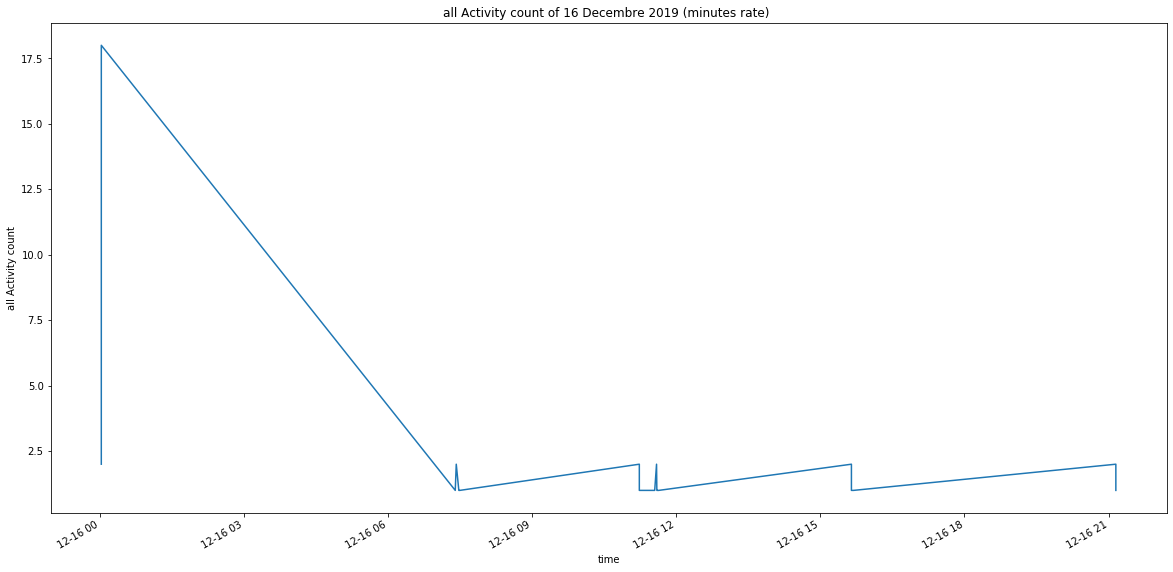

In [50]:
dm2 = dm.loc['2019-12-16':'2019-12-16']
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.gcf().autofmt_xdate()
             
plt.title('all Activity count of 16 Decembre 2019 (minutes rate) ')
plt.ylabel('all Activity count')
plt.xlabel('time')
plt.show() 


## Separating Dataframe based on routing key categories
The idea mainly is to study individually each group of routing keys in order to understand trends.
This enables us to analyze each events behaviour (such as connection behavior) independently from other events behaviours and therefore the possibility of a better anomaly detecting

Here we gather similar events along with their corresponding class code(based on encoding by LabelEncoder in previous steps)

    event_type    code
    connection.closed   4            
    connection.created  5          

    channel.created      3              
    channel.closed       2              


    consumer.created     6             
    consumer.deleted     7            


    binding.created     0               
    binding.deleted     1  
            
    queue.created        13            
    queue.deleted        14               

    user.tags.set                 21              
    user.created                  18            
    user.deleted                  19              
    user.authentication.failure   16       
    user.authentication.success   17    
    user.password.changed         20       

    exchange.deleted                    9
    exchange.created                    8

    topic.permission.created            15
    permission.created                  11
    permission.deleted                  12

    vhost.down                          22
    node.node.stats                     10

In [51]:

channel_ = df.loc[df['route_key'].isin([2 , 3])]
connect_ = df.loc[df['route_key'].isin([4 , 5])]
consum_ = df.loc[df['route_key'].isin([6 , 7])]
bind_ = df.loc[df['route_key'].isin([0 , 1])]
queue_ = df.loc[df['route_key'].isin([13 , 14])]
user_  = df.loc[df['route_key'].isin([16 , 17 , 18 ,19, 20 , 21])]
exchange_ = df.loc[df['route_key'].isin([8 , 9])]
perm_ = df.loc[df['route_key'].isin([11 , 12 ,15])] #includes the topic.permission.created along with permissions
stats_ = df.loc[df['route_key'].isin([10 , 22 ])]




## Channels related Events
    channel.created            
    channel.closed 

In [52]:

print(" Channel Size")
print(channel_.shape)

 Channel Size
(157908, 29)


In [53]:
groupped_data  = channel_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m=groupped_data.max()
print(m)
print("")
print(" Channel Groupped Data")
groupped_data



COUNT MAX :
count    10388
dtype: int64

 Channel Groupped Data


count
year month day hour minutes routing_key     headers.name                              headers.user_who_performed_action       
2019 1     28  14   38      channel.created 10.238.28.1:38128 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                    39      channel.created 10.238.28.1:38130 -> 10.238.28.5:5672 (1) bus-consolesaas                        2
                                            10.238.28.1:38130 -> 10.238.28.5:5672 (2) bus-consolesaas                        2
                                            10.238.28.1:38130 -> 10.238.28.5:5672 (3) bus-consolesaas                        2
                    40      channel.created 10.238.28.1:35406 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
...                                                                                                                        ...
2020 3     27  14   11      channel.created 10.238.28.9:53904 -> 10.238.28.5:5672 (1) bus-consolesaas                        1
                    12      channel.created 10.238.28.8:50104 -> 10.238.28.5:5672 (1) bus-consolesaas                        1
                                            10.238.28.9:53904 -> 10.238.28.5:5672 (1) bus-consolesaas                        1
               15   49      channel.created 172.17.0.1:46110 -> 172.17.0.14:5672 (1)  admin                                  1
               16   34      channel.created 10.238.28.1:56210 -> 10.238.28.5:5672 (1) bus-consolesaas                        1

[5157 rows x 1 columns]

In [54]:
a, b =mad_based_outlier(groupped_data['count'])
print(a)
b
print('')
print('MAD Outlier detection')
print('Threshold')
anom = groupped_data[b].copy()
anom


median
[2.]

diff
[70.  0.  0. ...  1.  1.  1.]

med abs deviation
1.0

modified z score 
[47.215   0.      0.     ...  0.6745  0.6745  0.6745]
[47.215   0.      0.     ...  0.6745  0.6745  0.6745]

MAD Outlier detection
Threshold


count
year month day hour minutes routing_key     headers.name                              headers.user_who_performed_action       
2019 1     28  14   38      channel.created 10.238.28.1:38128 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                    40      channel.created 10.238.28.1:35406 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                                            10.238.28.1:35452 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                    47      channel.created 10.238.28.1:38264 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
                    50      channel.created 10.238.28.1:35544 -> 10.238.28.5:5672 (1) bus-consolesaas                       72
...                                                                                                                        ...
2020 3     23  23   2       channel.created 10.238.28.8:36480 -> 10.238.28.5:5672 (1) bus-consolesaas                       32
           24  23   2       channel.created 10.238.28.8:36480 -> 10.238.28.5:5672 (1) bus-consolesaas                       16
           25  2    3       channel.created 10.238.28.8:36480 -> 10.238.28.5:5672 (1) bus-consolesaas                       20
               23   2       channel.created 10.238.28.8:41086 -> 10.238.28.5:5672 (1) bus-consolesaas                       10
           26  23   2       channel.created 10.238.28.8:50104 -> 10.238.28.5:5672 (1) bus-consolesaas                       42

[331 rows x 1 columns]

In [55]:
print(" CHANNELS EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

groupped_data[groupped_data['count']> upper_limit ] 

 CHANNELS EVENTS STATS :
DATA MEAN :
15.32732208648439
  STD : 
295.3702354831372

 Anomaly_cut_off value (aka std * 3 value) 
886.1107064494116

   LIMIT VALUES  :
upper_limit value
901.438028535896
lower_limit value
-870.7833843629272


count
year month day hour minutes routing_key     headers.name                              headers.user_who_performed_action       
2019 2     14  11   14      channel.created 10.238.28.1:47446 -> 10.238.28.5:5672 (1) bus-consolesaas                     4422
                    45      channel.created 10.238.28.1:39342 -> 10.238.28.5:5672 (1) bus-consolesaas                     4151
                    46      channel.created 10.238.28.1:39342 -> 10.238.28.5:5672 (1) bus-consolesaas                     9232
               16   38      channel.created 10.238.28.1:39968 -> 10.238.28.5:5672 (1) bus-consolesaas                     9190
                    39      channel.created 10.238.28.1:39968 -> 10.238.28.5:5672 (1) bus-consolesaas                     4193
     5     29  10   35      channel.created 10.238.28.1:33454 -> 10.238.28.5:5672 (1) bus-consolesaas                    10385
     6     13  14   42      channel.created 10.238.28.1:39510 -> 10.238.28.5:5672 (1) bus-consolesaas                    10388
     11    29  0    2       channel.created 10.238.28.1:37568 -> 10.238.28.5:5672 (1) bus-consolesaas                     1712
2020 1     10  0    2       channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     1245
           17  0    2       channel.created 10.238.28.1:49906 -> 10.238.28.5:5672 (1) bus-consolesaas                     2233

In [56]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)


### Channels activity Visualization with a modified period

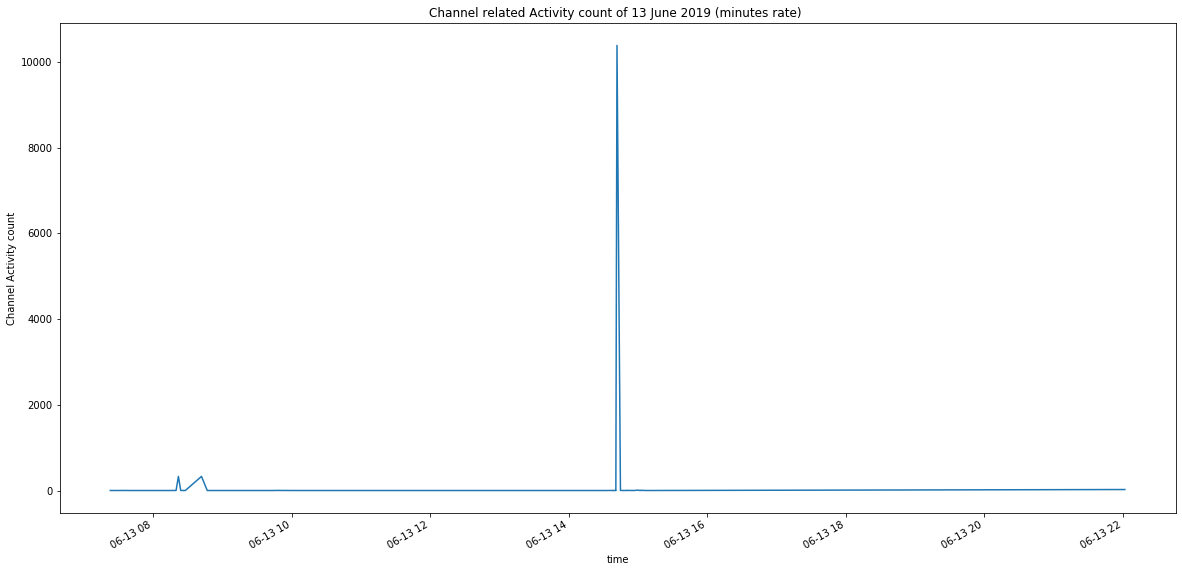

In [57]:
dm2 = dm.loc['2019-06-13':'2019-06-13']
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.gcf().autofmt_xdate()
             
plt.title('Channel related Activity count of 13 June 2019 (minutes rate) ')
plt.ylabel('Channel Activity count')
plt.xlabel('time')
plt.show() 



In [58]:

dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "channels_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Connection related Events
    connection.closed            
    connection.created

In [59]:
groupped_data  = connect_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)
groupped_data


COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes routing_key        headers.name                            headers.user_who_performed_action       
2019 1     28  14   38      connection.created 10.238.28.1:38128 -> 10.238.28.5:5672   bus-consolesaas                        1
                    39      connection.created 10.238.28.1:38130 -> 10.238.28.5:5672   bus-consolesaas                        1
                    40      connection.created 10.238.28.1:35406 -> 10.238.28.5:5672   bus-consolesaas                        1
                                               10.238.28.1:35452 -> 10.238.28.5:5672   bus-consolesaas                        1
                                               10.238.28.1:38178 -> 10.238.28.5:5672   bus-consolesaas                        1
...                                                                                                                         ...
2020 3     26  17   47      connection.created 10.34.132.254:56972 -> 10.238.28.5:5672 blmom-enfance                          1
           27  7    36      connection.created 10.34.132.254:60596 -> 10.238.28.5:5672 blmom-enfance                          1
               8    48      connection.created 10.34.132.254:32770 -> 10.238.28.5:5672 blmom-enfance                          1
               15   49      connection.created 172.17.0.1:46110 -> 172.17.0.14:5672    admin                                  1
               16   34      connection.created 10.238.28.1:56210 -> 10.238.28.5:5672   bus-consolesaas                        1

[2039 rows x 1 columns]

In [60]:
print(" CONNECTION EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 CONNECTION EVENTS STATS :
DATA MEAN :
1.0
  STD : 
0.0

 Anomaly_cut_off value (aka std * 3 value) 
0.0

   LIMIT VALUES  :
upper_limit value
1.0
lower_limit value
1.0


,,,,,,,,count
year,month,day,hour,minutes,routing_key,headers.name,headers.user_who_performed_action,


In [61]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'] , x['minutes']), axis=1)


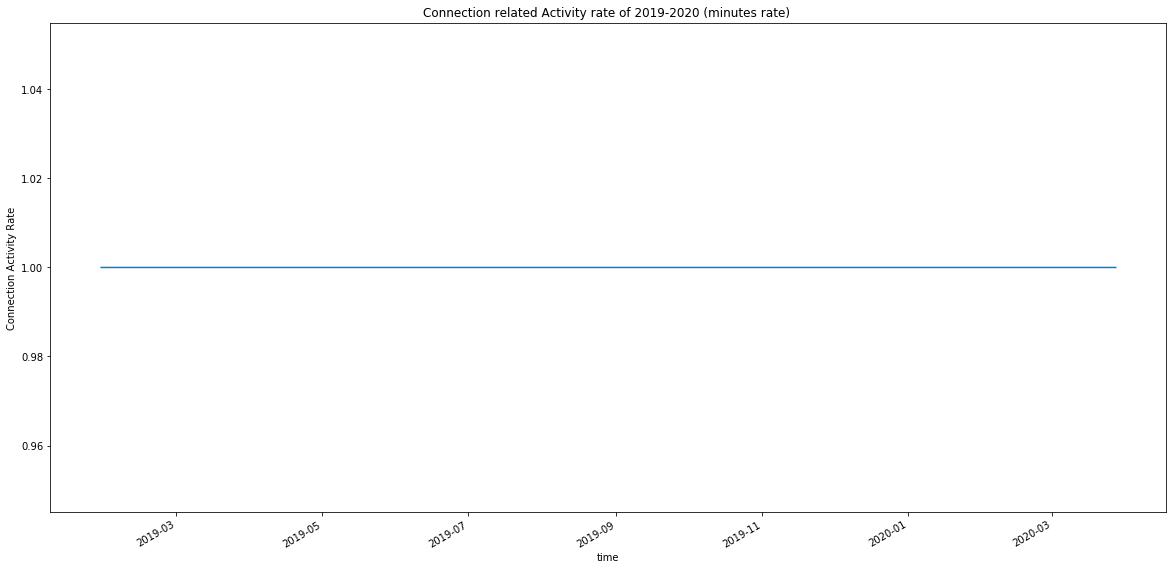

In [62]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Connection related Activity rate of 2019-2020 (minutes rate) ')
plt.ylabel('Connection Activity Rate')
plt.xlabel('time')

plt.show()

In [63]:
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "connect_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Consummer related Events
    consumer.created                 
    consumer.deleted                


In [64]:

print(" Consummer Size")
print(consum_.shape)

 Consummer Size
(3575, 29)


In [65]:
consum_.head()

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01 15:40:23+00:00,consumer.deleted,1583077223236,NaN,NaN,/,amq.ctag-M0RcJABURipDEN0uVtdvMg,<rabbit@rabbitmq-test.1.18414.3>,NaN,NaN,NaN,NaN,admin,event.all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,1,15,40,23,7,0
2020-03-01 16:06:17+00:00,consumer.created,1583078777696,NaN,NaN,/,amq.ctag-1-Xu2aSXrPF1bGdVpiKu5g,<rabbit@rabbitmq-test.1.15648.9>,NaN,NaN,NaN,NaN,admin,event.all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,1,16,6,17,6,0
2020-03-01 16:09:44+00:00,consumer.deleted,1583078984089,NaN,NaN,/,amq.ctag-1-Xu2aSXrPF1bGdVpiKu5g,<rabbit@rabbitmq-test.1.15648.9>,NaN,NaN,NaN,NaN,admin,event.all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,1,16,9,44,7,0
2020-03-01 16:11:30+00:00,consumer.created,1583079090857,NaN,NaN,/,amq.ctag-WptWQJeGIAoP4LphAJ6BWg,<rabbit@rabbitmq-test.1.16119.9>,NaN,NaN,NaN,NaN,admin,event.all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,1,16,11,30,6,0
2020-03-01 16:12:06+00:00,consumer.deleted,1583079126197,NaN,NaN,/,amq.ctag-WptWQJeGIAoP4LphAJ6BWg,<rabbit@rabbitmq-test.1.16119.9>,NaN,NaN,NaN,NaN,admin,event.all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,1,16,12,6,7,0


In [66]:
groupped_data  = consum_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,#'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    12
dtype: int64


count
year month day hour minutes routing_key      headers.user_who_performed_action       
2019 1     28  14   38      consumer.deleted bus-consolesaas                        3
                    39      consumer.created bus-consolesaas                        3
                    40      consumer.created bus-consolesaas                        3
                            consumer.deleted bus-consolesaas                        3
                    47      consumer.deleted bus-consolesaas                        3
...                                                                               ...
2020 3     27  8    47      consumer.deleted blmom-enfance                          1
                    48      consumer.created blmom-enfance                          1
               15   46      consumer.deleted admin                                  1
                    49      consumer.created admin                                  1
               16   34      consumer.created bus-consolesaas                        1

[2329 rows x 1 columns]

In [67]:
print(" CONSUMMER EVENTS STATS :")
print(" MAD :")

a, b =mad_based_outlier(groupped_data['count'])
print(a)
print('')
print('MAD Outlier detection')

anom = groupped_data[b].copy()
print('Threshold')
print(anom.min())
anom

 CONSUMMER EVENTS STATS :
 MAD :

median
[1.]

diff
[2. 2. 2. ... 0. 0. 0.]

med abs deviation
0.0

modified z score 
[inf inf inf ... nan nan nan]
[inf inf inf ... nan nan nan]

MAD Outlier detection
Threshold
count    2
dtype: int64


C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater


count
year month day hour minutes routing_key      headers.user_who_performed_action       
2019 1     28  14   38      consumer.deleted bus-consolesaas                        3
                    39      consumer.created bus-consolesaas                        3
                    40      consumer.created bus-consolesaas                        3
                            consumer.deleted bus-consolesaas                        3
                    47      consumer.deleted bus-consolesaas                        3
...                                                                               ...
2020 3     26  10   11      consumer.created bus-keycloak                           3
                                             bus-relay                              3
                            consumer.deleted rmq-internal                          12
               17   45      consumer.created bus-consolesaas                        2
                            consumer.deleted rmq-internal                           2

[693 rows x 1 columns]

In [68]:

print(" STD :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 STD :
DATA MEAN :
1.5345641906397596
  STD : 
1.0849427277414054

 Anomaly_cut_off value (aka std * 3 value) 
3.254828183224216

   LIMIT VALUES  :
upper_limit value
4.789392373863976
lower_limit value
-1.7202639925844565


count
year month day hour minutes routing_key      headers.user_who_performed_action       
2019 2     2   2    12      consumer.deleted rmq-internal                           8
                    13      consumer.created bus-consolesaas                        6
           3   2    10      consumer.deleted bus-consolesaas                        5
                    11      consumer.created bus-consolesaas                        6
           5   12   58      consumer.created bus-consolesaas                        6
                            consumer.deleted bus-consolesaas                        6
               14   14      consumer.created bus-consolesaas                        6
     3     19  2    10      consumer.deleted bus-consolesaas                        5
                    11      consumer.created bus-consolesaas                        6
                    12      consumer.created bus-consolesaas                        6
     4     30  1    7       consumer.created bus-consolesaas                        5
     5     16  1    21      consumer.created bus-consolesaas                        5
     7     12  19   42      consumer.created bus-consolesaas                        6
     8     1   1    29      consumer.created bus-consolesaas                        6
     9     4   1    16      consumer.deleted bus-consolesaas                        5
                    17      consumer.created bus-consolesaas                        5
           18  1    19      consumer.deleted bus-consolesaas                        5
                    21      consumer.created bus-consolesaas                        5
                    32      consumer.created bus-consolesaas                        7
     10    3   1    24      consumer.deleted rmq-internal                          10
                    26      consumer.created bus-consolesaas                        7
                    30      consumer.deleted bus-consolesaas                        5
                    32      consumer.created bus-consolesaas                        5
           9   1    17      consumer.deleted bus-consolesaas                        5
                    19      consumer.created bus-consolesaas                        5
           12  1    8       consumer.deleted bus-consolesaas                        5
                    9       consumer.created bus-consolesaas                        5
           22  1    9       consumer.deleted bus-consolesaas                        5
                    11      consumer.created bus-consolesaas                        5
                    13      consumer.created bus-consolesaas                        7
     11    15  2    6       consumer.deleted bus-consolesaas                        5
                    8       consumer.created bus-consolesaas                        5
                            consumer.deleted bus-consolesaas                        5
                    10      consumer.created bus-consolesaas                        5
           16  2    9       consumer.created bus-consolesaas                        7
     12    4   2    10      consumer.created bus-consolesaas                        7
           7   2    12      consumer.deleted bus-consolesaas                        5
                    13      consumer.created bus-consolesaas                        5
                    17      consumer.deleted rmq-internal                          11
                    19      consumer.created bus-consolesaas                        7
2020 1     6   16   48      consumer.created bus-consolesaas                        6
           21  22   7       consumer.created bus-consolesaas                       10
     2     6   2    9       consumer.created bus-consolesaas                       10
                    12      consumer.deleted bus-consolesaas                        7
                    14      consumer.created bus-consolesaas                        5
           14  2    20      consumer.d

In [69]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)


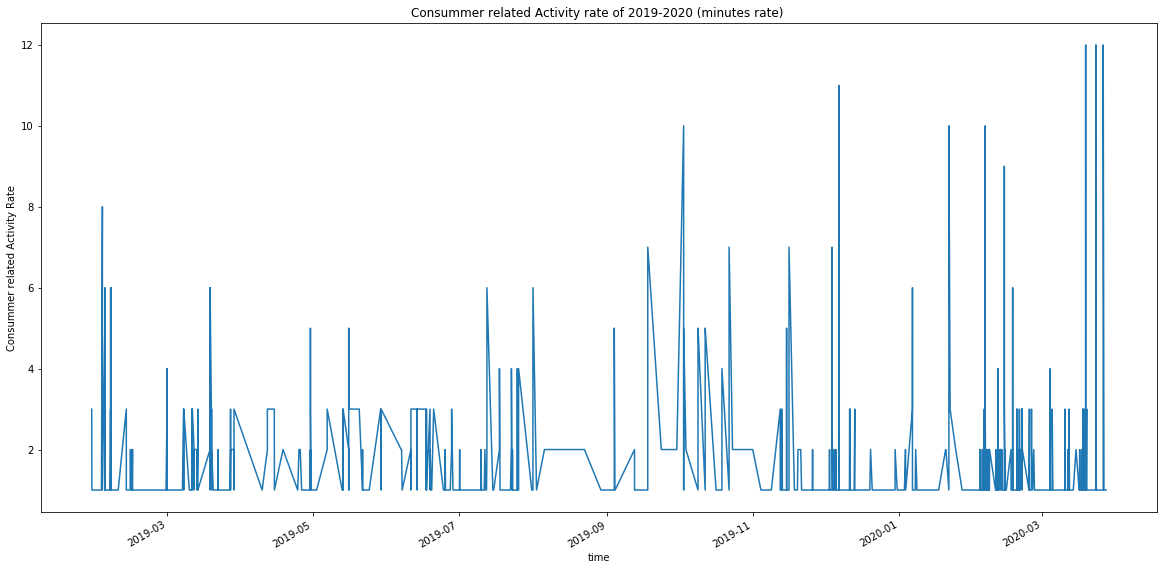

In [70]:
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Consummer related Activity rate of 2019-2020 (minutes rate) ')
plt.ylabel('Consummer related Activity Rate')
plt.xlabel('time')

plt.show()

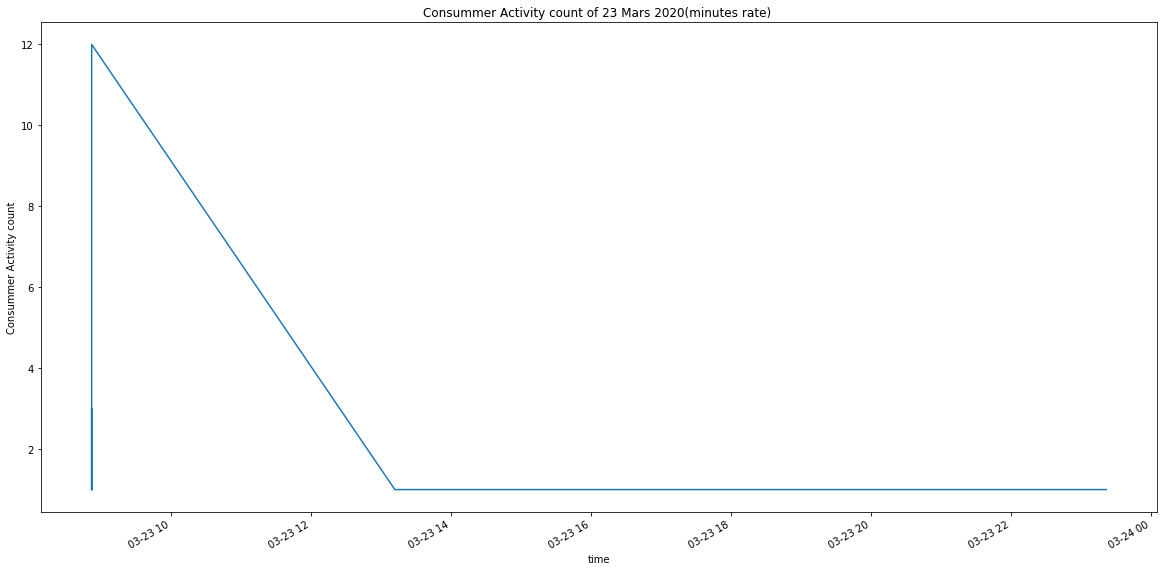

In [71]:
dm2 = dm.loc['2020-03-23':'2020-03-23']
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.gcf().autofmt_xdate()
             
plt.title('Consummer Activity count of 23 Mars 2020(minutes rate) ')
plt.ylabel('Consummer Activity count')
plt.xlabel('time')
plt.show() 

In [72]:
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "consum_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Binding Events 
    binding.created                
    binding.deleted     

In [73]:
bind_.head()

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-14 09:38:40+00:00,binding.deleted,1550137120704,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,14,9,38,40,1,0
2019-02-14 09:38:40+00:00,binding.deleted,1550137120704,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,14,9,38,40,1,0
2019-02-14 09:38:46+00:00,binding.deleted,1550137126645,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,14,9,38,46,1,0
2019-02-14 09:38:46+00:00,binding.deleted,1550137126645,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,14,9,38,46,1,0
2019-02-14 09:38:51+00:00,binding.deleted,1550137131997,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,14,9,38,51,1,0


In [74]:
groupped_data  = bind_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,#'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})

#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('MAX COUNT')
m = groupped_data.max()
print(m)

groupped_data


MAX COUNT
count    6
dtype: int64


count
year month day hour minutes routing_key     headers.user_who_performed_action       
2019 2     14  9    38      binding.deleted rmq-internal                           6
               11   2       binding.created bus-accesstoken                        2
                                            rmq-internal                           2
                    8       binding.created bus-accesstoken                        2
                                            rmq-internal                           2
     3     8   1    38      binding.created bus-consolesaas                        3
                                            rmq-internal                           3
     5     29  10   15      binding.created bus-consolesaas                        3
                                            rmq-internal                           3
                            binding.deleted rmq-internal                           2
                    16      binding.deleted rmq-internal                           4
     6     13  8    20      binding.created bus-consolesaas                        3
                                            rmq-internal                           3
               14   39      binding.deleted rmq-internal                           6
           19  12   1       binding.created bus-consolesaas                        1
                                            rmq-internal                           1
     7     10  7    22      binding.created bus-blsenior                           1
                                            rmq-internal                           1
           23  12   43      binding.deleted rmq-internal                           6
     8     29  11   13      binding.created bus-consolesaas                        1
                                            rmq-internal                           1
     10    17  15   9       binding.created bus-consolesaas                        1
                                            rmq-internal                           1
                            binding.deleted rmq-internal                           2
     11    22  15   41      binding.created blmom-enfance                          1
                                            rmq-internal                           1
     12    13  14   27      binding.created bus-consolesaas                        3
                                            rmq-internal                           3
2020 2     11  8    12      binding.created bus-decisionnel                        1
                                            rmq-internal                           1
               9    44      binding.created bus-decisionnel                        1
                                            rmq-internal                           1
                    45      binding.created bus-decisionnel                        1
                                            rmq-internal                           1
                    46      binding.deleted rmq-internal                           2
           13  10   24      binding.created bus-consolesaas                        1
                                            rmq-internal                           1
           19  10   11      binding.deleted rmq-internal                           2
     3     9   9    37      binding.created bus-rabbitmq-interop                   1
                                            rmq-internal                           1
               11   4       binding.deleted rmq-internal                           2
               16   12      binding.created bus-rabbitmq-interop                   1
                                            rmq-internal                           1
           11  9    3       binding.deleted rmq-internal                           2
           16  16   32      binding.created bus-rabbitmq-interop                   1
                                            rmq-internal                           1

In [75]:
print(" BINDING EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 BINDING EVENTS STATS :
DATA MEAN :
1.8305084745762712
  STD : 
1.2371720400606547

 Anomaly_cut_off value (aka std * 3 value) 
3.7115161201819644

   LIMIT VALUES  :
upper_limit value
5.542024594758235
lower_limit value
-1.8810076456056932


count
year month day hour minutes routing_key     headers.user_who_performed_action       
2019 2     14  9    38      binding.deleted rmq-internal                           6
     6     13  14   39      binding.deleted rmq-internal                           6
     7     23  12   43      binding.deleted rmq-internal                           6

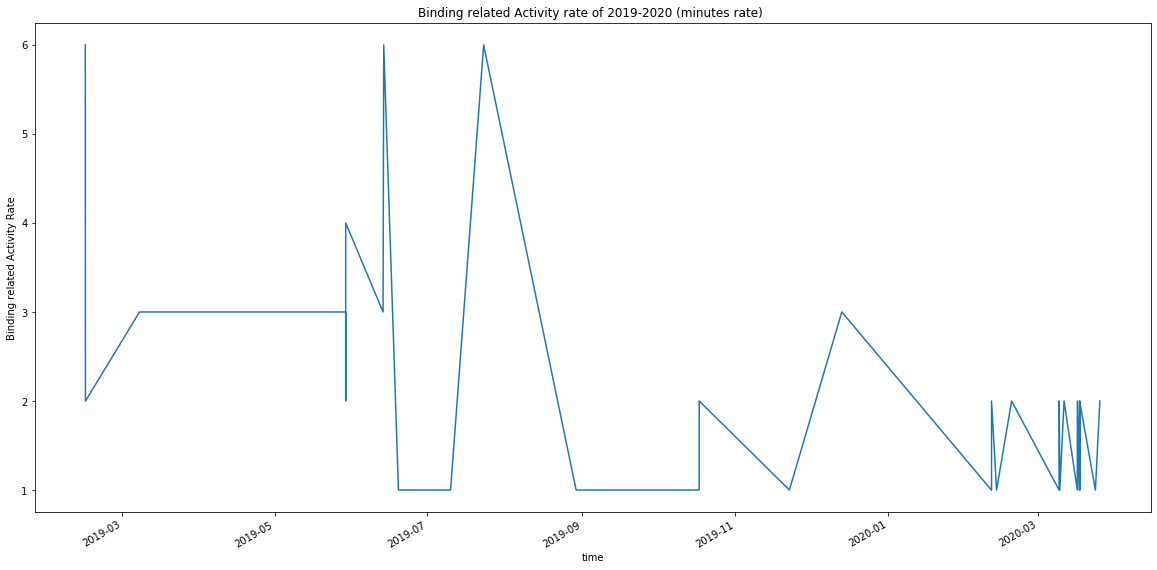

In [76]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Binding related Activity rate of 2019-2020 (minutes rate) ')
plt.ylabel('Binding related Activity Rate')
plt.xlabel('time')

plt.show()

In [77]:
dm.head()

,year,month,day,hour,minutes,routing_key,headers.user_who_performed_action,count
2019-02-14 09:38:00,2019,2,14,9,38,binding.deleted,rmq-internal,6
2019-02-14 11:02:00,2019,2,14,11,2,binding.created,bus-accesstoken,2
2019-02-14 11:02:00,2019,2,14,11,2,binding.created,rmq-internal,2
2019-02-14 11:08:00,2019,2,14,11,8,binding.created,bus-accesstoken,2
2019-02-14 11:08:00,2019,2,14,11,8,binding.created,rmq-internal,2


In [78]:
#saving results to csv file under the results_data directory
file_csv = "binding_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## QUEUE EVENTS RELATED
    queue.created                 
    queue.deleted        

In [79]:
groupped_data  = queue_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data



COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes routing_key   headers.name                                       headers.user_who_performed_action       
2019 2     14  9    38      queue.deleted pubsub.default.consoleSaasApplicationRoleBootst... admin                                  1
                                          pubsub.default.consoleSaasClientContractBootstr... admin                                  1
                                          pubsub.default.consoleSaasUserAccessBootstrap.k... admin                                  1
               11   2       queue.created pubsub.default.consoleSaasClientContract.access... bus-accesstoken                        1
                                          pubsub.default.consoleSaasUserAccess.accesstoke... bus-accesstoken                        1
                    8       queue.created pubsub.default.consoleSaasClientContractBootstr... bus-accesstoken                        1
                                          pubsub.default.consoleSaasUserAccessBootstrapAc... bus-accesstoken                        1
     3     8   1    38      queue.created pubsub.default.consoleSaasApplicationRoleBootst... bus-consolesaas                        1
                                          pubsub.default.consoleSaasClientContractBootstr... bus-consolesaas                        1
                                          pubsub.default.consoleSaasUserAccessBootstrap.k... bus-consolesaas                        1
     5     29  10   15      queue.created pubsub.default.consoleSaasApplicationRoleBootst... bus-consolesaas                        1
                                          pubsub.default.consoleSaasClientContractBootstr... bus-consolesaas                        1
                                          pubsub.default.consoleSaasUserAccessBootstrapKe... bus-consolesaas                        1
                            queue.deleted pubsub.default.consoleSaasApplicationRoleBootst... admin                                  1
                    16      queue.deleted pubsub.default.consoleSaasClientContractBootstr... admin                                  1
                                          pubsub.default.consoleSaasUserAccessBootstrap.k... admin                                  1
     6     13  8    20      queue.created pubsub.default.consoleSaasApplicationRoleBootst... bus-consolesaas                        1
                                          pubsub.default.consoleSaasClientContractBootstr... bus-consolesaas                        1
                                          pubsub.default.consoleSaasUserAccessBootstrapKe... bus-consolesaas                        1
               14   39      queue.deleted pubsub.default.consoleSaasApplicationRoleBootst... admin                                  1
                                          pubsub.default.consoleSaasClientContractBootstr... admin                                  1
                                          pubsub.default.consoleSaasUserAccessBootstrapKe... admin                                  1
           19  12   1       queue.created pubsub.default.consoleSaasUserAccess.pen-consol... bus-consolesaas                        1
     7     10  7    22      queue.created pubsub.default.consoleSaasClientContract.blseni... bus-blsenior                           1
           23  12   43      queue.deleted pubsub.default.consoleSaasClientContractBootstr... admin                                  1
                                          pubsub.default.consoleSaasUserAccess.accesstoke... admin                                  1
                                          pubsub.default.consoleSaasUserAccessBootstrapAc... admin                                  1
     8     29  11   13      queue.created pubsub.default.consoleSaasUserAccess.rabbitmq-c... bus-consolesaas                        1
     10    17  15   9       queue.created pubsub.default.consoleSaasUserAccess.rabbitmq-c... bus-consolesaas

In [80]:

print(" QUEUE EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 QUEUE EVENTS STATS :
DATA MEAN :
1.0
  STD : 
0.0

 Anomaly_cut_off value (aka std * 3 value) 
0.0

   LIMIT VALUES  :
upper_limit value
1.0
lower_limit value
1.0


,,,,,,,,count
year,month,day,hour,minutes,routing_key,headers.name,headers.user_who_performed_action,


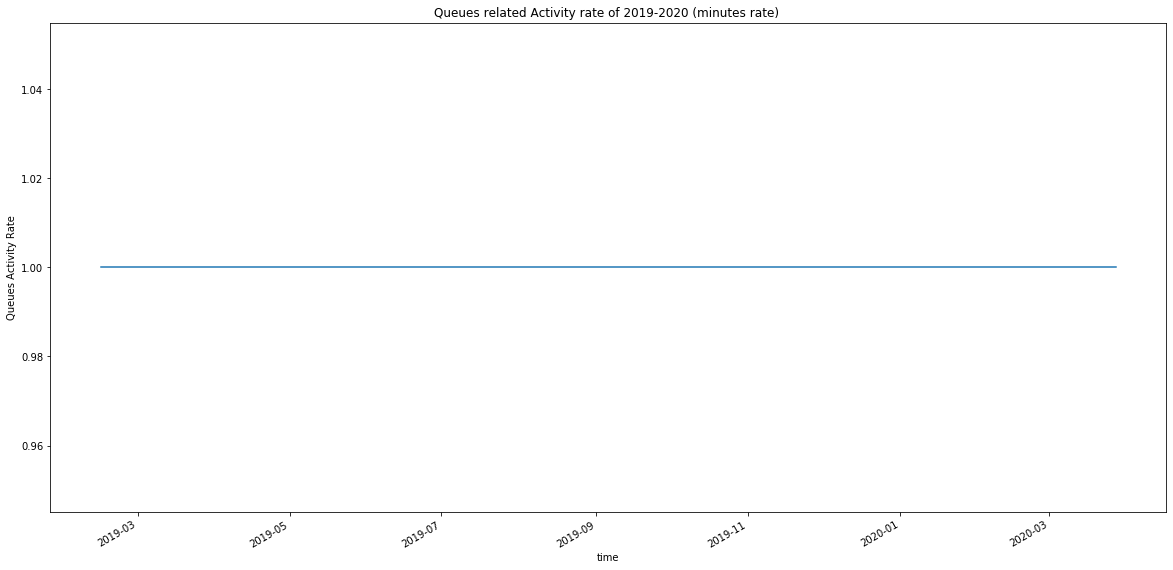

In [81]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'] , x['minutes']), axis=1)
#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Queues related Activity rate of 2019-2020 (minutes rate) ')
plt.ylabel('Queues Activity Rate')
plt.xlabel('time')

plt.show()

In [82]:
#saving results to csv file under the results_data directory
file_csv = "queue_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## User Related Events
    user.tags.set                              
    user.created                             
    user.deleted                              
    user.authentication.failure         
    user.authentication.success       
    user.password.changed                  

In [83]:
groupped_data  = user_.groupby(['year','month','day','hour' , 'minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    6
dtype: int64


count
year month day hour minutes routing_key   headers.name            headers.user_who_performed_action       
2019 2     14  11   2       user.created  bus-accesstoken         admin                                  1
                            user.tags.set bus-accesstoken         admin                                  1
     8     29  13   47      user.created  admintest               admin                                  1
                            user.tags.set admintest               admin                                  1
               14   1       user.created  popeye                  admintest                              6
...                                                                                                    ...
2020 3     9   15   45      user.created  bus-keycloak            admin                                  1
                            user.tags.set bus-keycloak            admin                                  1
                    46      user.deleted  bus-portail-decisionnel admin                                  1
           18  13   59      user.created  bus-socle               admin                                  1
                            user.tags.set bus-socle               admin                                  1

[384 rows x 1 columns]

In [84]:

print(" USER EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 


 USER EVENTS STATS :
DATA MEAN :
1.7291666666666667
  STD : 
1.1590150871417593

 Anomaly_cut_off value (aka std * 3 value) 
3.477045261425278

   LIMIT VALUES  :
upper_limit value
5.206211928091944
lower_limit value
-1.747878594758611


count
year month day hour minutes routing_key   headers.name   headers.user_who_performed_action       
2019 8     29  14   1       user.created  popeye         admintest                              6
                            user.tags.set popeye         admintest                              6
               15   42      user.created  popeye         admintest                              6
                            user.tags.set popeye         admintest                              6
     10    18  10   22      user.created  blmom-56776-bl admin                                  6
                            user.deleted  blmom-56776-bl admin                                  6
                            user.tags.set blmom-56776-bl admin                                  6
                    31      user.created  blmom-1234     admin                                  6
                            user.deleted  blmom-1234     admin                                  6
                            user.tags.set blmom-1234     admin                                  6

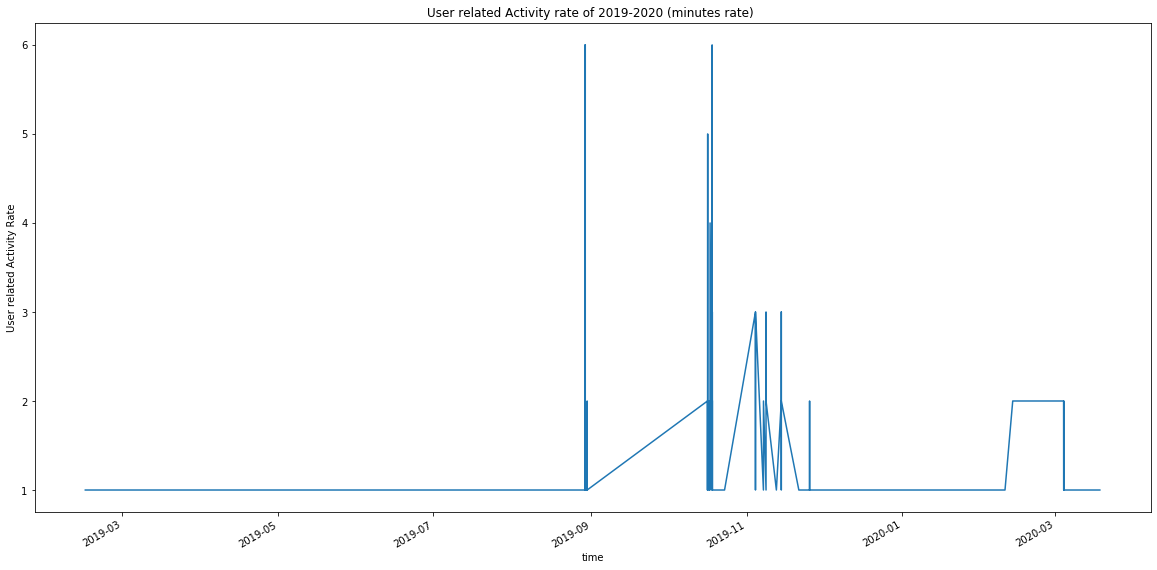

In [85]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('User related Activity rate of 2019-2020 (minutes rate) ')
plt.ylabel('User related Activity Rate')
plt.xlabel('time')

plt.show()

In [86]:
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "user_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## Exchange related events
    exchange.deleted                    
    exchange.created                    

In [87]:
exchange_.isnull().sum()

routing_key                           0
headers.timestamp_in_ms               0
headers.node                         18
headers.name                          0
headers.vhost                         0
headers.consumer_tag                 18
headers.channel                      18
headers.peer_port                    18
headers.port                         18
headers.peer_host                    18
headers.connection_type              18
headers.user_who_performed_action     0
headers.queue                        18
headers.user                         18
headers.connection                   18
headers.host                         18
headers.ssl_hash                     18
headers.auth_mechanism               18
headers.peer_host                    18
headers.connection_name              18
headers.connection_type              18
year                                  0
month                                 0
day                                   0
hour                                  0


In [88]:
groupped_data  = exchange_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes routing_key      headers.name                                       headers.user_who_performed_action       
2019 2     14  9    38      exchange.deleted pubsub.default.consoleSaasApplicationRoleBootst... rmq-internal                           1
                                             pubsub.default.consoleSaasClientContractBootstr... rmq-internal                           1
                                             pubsub.default.consoleSaasUserAccessBootstrap.p... rmq-internal                           1
               11   8       exchange.created pubsub.default.consoleSaasClientContractBootstr... bus-accesstoken                        1
                                             pubsub.default.consoleSaasUserAccessBootstrapAc... bus-accesstoken                        1
     3     8   1    38      exchange.created pubsub.default.consoleSaasApplicationRoleBootst... bus-consolesaas                        1
                                             pubsub.default.consoleSaasClientContractBootstr... bus-consolesaas                        1
                                             pubsub.default.consoleSaasUserAccessBootstrap.p... bus-consolesaas                        1
     5     29  10   15      exchange.created pubsub.default.consoleSaasApplicationRoleBootst... bus-consolesaas                        1
                                             pubsub.default.consoleSaasClientContractBootstr... bus-consolesaas                        1
                                             pubsub.default.consoleSaasUserAccessBootstrapKe... bus-consolesaas                        1
                            exchange.deleted pubsub.default.consoleSaasApplicationRoleBootst... rmq-internal                           1
                    16      exchange.deleted pubsub.default.consoleSaasClientContractBootstr... rmq-internal                           1
                                             pubsub.default.consoleSaasUserAccessBootstrap.p... rmq-internal                           1
     7     23  12   43      exchange.deleted pubsub.default.consoleSaasClientContractBootstr... rmq-internal                           1
                                             pubsub.default.consoleSaasUserAccessBootstrapAc... rmq-internal                           1
2020 2     11  9    44      exchange.created pubsub.default.consoleSaasClientAccess.publish     bus-decisionnel                        1
                    46      exchange.deleted pubsub.default.consoleSaasClientAccess.publish     rmq-internal                           1

In [89]:
print(" exchange EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

groupped_data[groupped_data['count']> upper_limit ] 

 exchange EVENTS STATS :
DATA MEAN :
1.0
  STD : 
0.0

 Anomaly_cut_off value (aka std * 3 value) 
0.0

   LIMIT VALUES  :
upper_limit value
1.0
lower_limit value
1.0


,,,,,,,,count
year,month,day,hour,minutes,routing_key,headers.name,headers.user_who_performed_action,


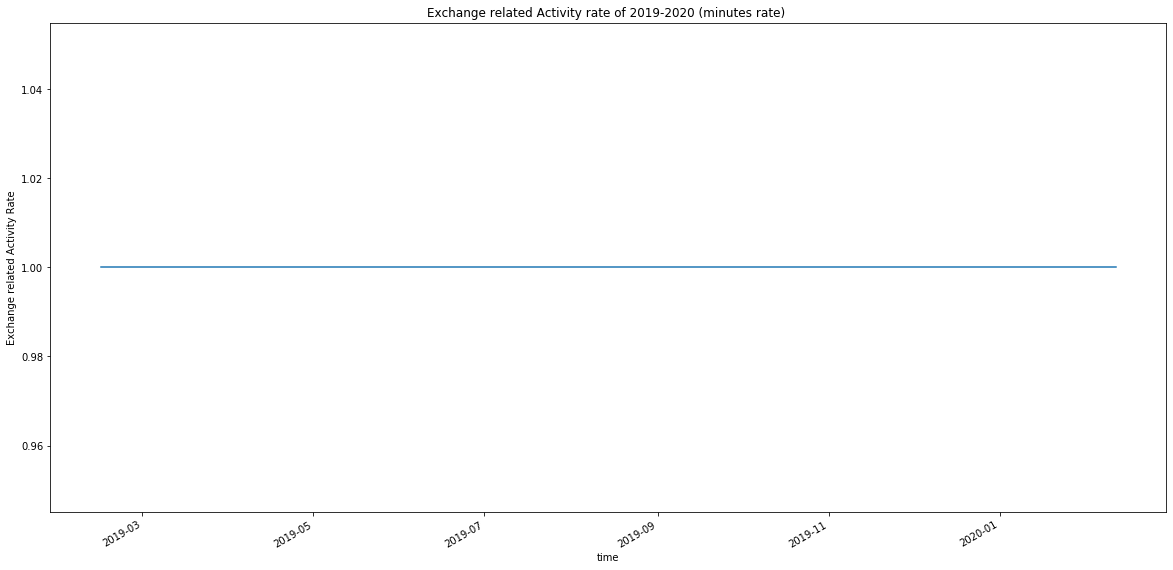

In [90]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Exchange related Activity rate of 2019-2020 (minutes rate) ')
plt.ylabel('Exchange related Activity Rate')
plt.xlabel('time')

plt.show()

In [91]:
#saving results to csv file under the results_data directory
file_csv = "exchange_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

In [92]:
dm.head()

,year,month,day,hour,minutes,routing_key,headers.name,headers.user_who_performed_action,count
2019-02-14 09:38:00,2019,2,14,9,38,exchange.deleted,pubsub.default.consoleSaasApplicationRoleBoots...,rmq-internal,1
2019-02-14 09:38:00,2019,2,14,9,38,exchange.deleted,pubsub.default.consoleSaasClientContractBootst...,rmq-internal,1
2019-02-14 09:38:00,2019,2,14,9,38,exchange.deleted,pubsub.default.consoleSaasUserAccessBootstrap....,rmq-internal,1
2019-02-14 11:08:00,2019,2,14,11,8,exchange.created,pubsub.default.consoleSaasClientContractBootst...,bus-accesstoken,1
2019-02-14 11:08:00,2019,2,14,11,8,exchange.created,pubsub.default.consoleSaasUserAccessBootstrapA...,bus-accesstoken,1


## Permission related Events 
    topic.permission.created            
    permission.created                  
    permission.deleted                  


In [93]:
perm_.head(2)

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-14 11:02:08+00:00,permission.created,1550142128814,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,bus-accesstoken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,14,11,2,8,11,0
2019-08-29 13:47:34+00:00,permission.created,1567086454633,NaN,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,admin,NaN,admintest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,8,29,13,47,34,11,0


*notes:* 
   
       we notice that the columns "headers.node" "headers.name" "user_who_performed" are null values ,therefore we 
    group by date and routing key only

In [94]:
groupped_data  = perm_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' 
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    5
dtype: int64


count
year month day hour minutes routing_key              
2019 2     14  11   2       permission.created      1
     8     29  13   47      permission.created      1
               14   11      permission.created      1
               15   47      permission.created      1
               19   30      permission.created      1
...                                               ...
2020 3     4   13   10      permission.created      1
           9   15   43      permission.created      1
                    44      permission.created      2
                    45      permission.created      1
           18  14   0       permission.created      1

[77 rows x 1 columns]

In [95]:
print(" Permissions EVENTS STATS :")
upper_limit, anom = find_anomalies(groupped_data['count'])

#FETCH rows where data count is outside the limit range
groupped_data[groupped_data['count']> upper_limit ] 

 Permissions EVENTS STATS :
DATA MEAN :
1.5584415584415585
  STD : 
0.6930734578766922

 Anomaly_cut_off value (aka std * 3 value) 
2.0792203736300765

   LIMIT VALUES  :
upper_limit value
3.637661932071635
lower_limit value
-0.520778815188518


count
year month day hour minutes routing_key              
2019 10    18  10   22      permission.created      4
                    31      permission.created      5

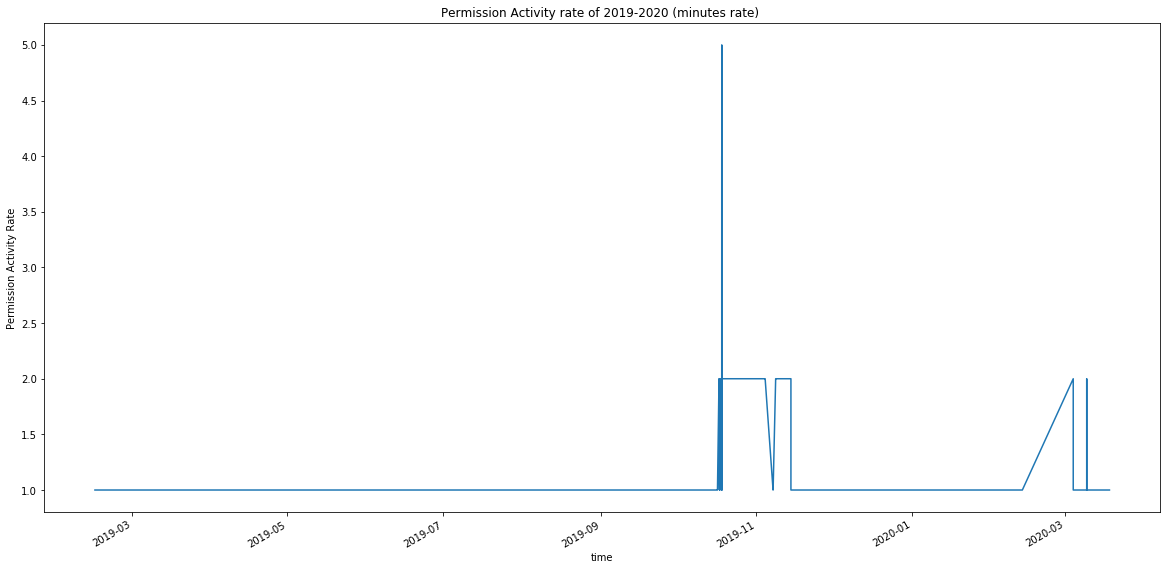

In [96]:
groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)

#plotting the activity rate figure
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Permission Activity rate of 2019-2020 (minutes rate) ')
plt.ylabel('Permission Activity Rate')
plt.xlabel('time')

plt.show()

In [97]:
dm.head()

,year,month,day,hour,minutes,routing_key,count
2019-02-14 11:02:00,2019,2,14,11,2,permission.created,1
2019-08-29 13:47:00,2019,8,29,13,47,permission.created,1
2019-08-29 14:11:00,2019,8,29,14,11,permission.created,1
2019-08-29 15:47:00,2019,8,29,15,47,permission.created,1
2019-08-29 19:30:00,2019,8,29,19,30,permission.created,1


                     year  month  day  hour  minutes         routing_key  \
2019-02-14 11:02:00  2019      2   14    11        2  permission.created   
2019-08-29 13:47:00  2019      8   29    13       47  permission.created   
2019-08-29 14:11:00  2019      8   29    14       11  permission.created   
2019-08-29 15:47:00  2019      8   29    15       47  permission.created   
2019-08-29 19:30:00  2019      8   29    19       30  permission.created   

                     count  
2019-02-14 11:02:00      1  
2019-08-29 13:47:00      1  
2019-08-29 14:11:00      1  
2019-08-29 15:47:00      1  
2019-08-29 19:30:00      1  


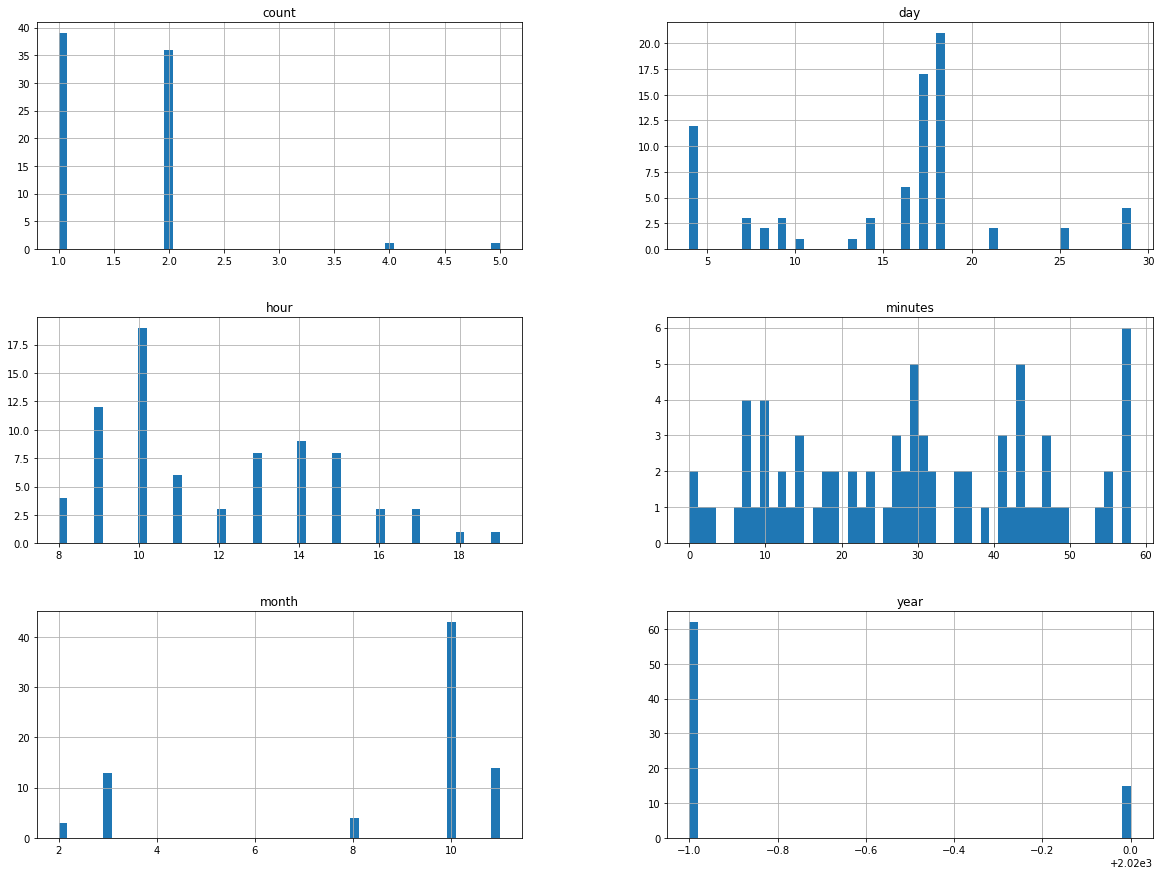

In [98]:
print(dm.head())

rec = dm.copy()

rec.hist(bins=50, figsize=(20,15))
plt.show()

In [99]:

dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)

#saving results to csv file under the results_data directory
file_csv = "perm_v1.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

*note*
       
     we can export the current results to csv file for further use

## Stats Events
    vhost.down                          
    node.node.stats                     

In [100]:
stats_.head()#6 rows × 28 columns
#stats_.isnull().sum()

,routing_key,headers.timestamp_in_ms,headers.node,headers.name,headers.vhost,headers.consumer_tag,headers.channel,headers.peer_port,headers.port,headers.peer_host,headers.connection_type,headers.user_who_performed_action,headers.queue,headers.user,headers.connection,headers.host,headers.ssl_hash,headers.auth_mechanism,headers.peer_host,headers.connection_name,headers.connection_type,year,month,day,hour,minutes,seconds,route_key,count
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04 02:23:42+00:00,vhost.down,1583288622972,rabbit@rabbitmq-test,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,4,2,23,42,22,0
2020-03-05 02:22:50+00:00,vhost.down,1583374970195,rabbit@rabbitmq-test,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,5,2,22,50,22,0
2020-03-12 02:10:56+00:00,vhost.down,1583979056896,rabbit@rabbitmq-test,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,12,2,10,56,22,0
2020-03-19 02:29:16+00:00,vhost.down,1584584956337,rabbit@rabbitmq-test,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,19,2,29,16,22,0
2019-02-02 02:12:18+00:00,vhost.down,1549073538296,rabbit@CSLSAASRBS1,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rmq-internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2,2,2,12,18,22,0


In [101]:

groupped_data  = stats_.groupby(['year','month','day','hour','minutes'
                                    ,'routing_key' ,'headers.name' ,
                                    'headers.user_who_performed_action'
                                 ]).agg({'count': 'size'})
#groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = groupped_data.max()
print(m)

groupped_data


COUNT MAX :
count    1
dtype: int64


count
year month day hour minutes routing_key headers.name headers.user_who_performed_action       
2019 2     2   2    12      vhost.down  /            rmq-internal                           1
2020 3     4   2    23      vhost.down  /            rmq-internal                           1
           5   2    22      vhost.down  /            rmq-internal                           1
           12  2    10      vhost.down  /            rmq-internal                           1
           19  2    29      vhost.down  /            rmq-internal                           1